# Explorations

In [2]:
from backend.connect_to_api import ResRobot

resrobot = ResRobot()

resrobot.access_id_from_location("Umeå")



Name                                     extId        Latitude     Longitude
--------------------------------------------------------------------------------
UMEÅ                                     740098065    63.830064    20.26681
Umeå Centralstation                      740000190    63.830064    20.26681
Umeå Busstation                          740020461    63.829983    20.264742
Umeå Östra station                       740001581    63.817659    20.293454
Umeå Vasaplan                            740020116    63.826136    20.267619
Umeå Airport                             740025159    63.793451    20.291908
Umeå Ålidhem centrum                     740023156    63.812175    20.316071
Umeå Ålidhöjd                            740045439    63.816185    20.314713
Umeå Älvans väg                          740045410    63.810584    20.337798
Umeå Alviksgränd                         740045280    63.796525    20.284797


In [2]:
from backend.connect_to_api import ResRobot
resrobot = ResRobot()

latitude = 57.655958  # Example: Göteborg (Gothenburg)
longitude = 12.018722
max_stops = 20

nearby_stops = resrobot.nearby_stops(latitude, longitude, max_results=max_stops)

Stop Name                                Stop ID    Latitude     Longitude    Distance   Transport Types
--------------------------------------------------------------------------------------------------------------
Mölndal station                          740000315  57.655958    12.018722    0          ['4', '8', '16', '128']
Mölndals bro                             740076251  57.655634    12.018587    36         ['8', '128']
Mölndals Innerstad                       740015633  57.656129    12.017032    102        ['64', '128']
Kvarnbyskolan (Mölndal kn)               740059796  57.656587    12.022964    262        ['128']
Storgatan (Mölndal kn)                   740059781  57.655383    12.011494    434        ['128']
Gamla torget (Mölndal kn)                740059797  57.656443    12.026623    473        ['128']
Ekgatan (Mölndal kn)                     740059795  57.661747    12.017418    648        ['128']
Mölndal Sjukhus                          740015635  57.66145     12.013472    

In [3]:
import requests
import os
from dotenv import load_dotenv

# Load API key from .env file (if applicable)
load_dotenv()
API_KEY = os.getenv("API_KEY")

# Set test coordinates (Göteborg / Gothenburg)
latitude = 57.708895
longitude = 11.973479

# API endpoint
url = "https://api.resrobot.se/v2.1/location.nearbystops"

# Query parameters
params = {
    "originCoordLat": latitude,
    "originCoordLong": longitude,
    "format": "json",
    "accessId": API_KEY  # Use the API key from the .env file
}

# Send request
try:
    response = requests.get(url, params=params)
    response.raise_for_status()  # Raise an error for bad responses
    data = response.json()

    # Print raw JSON response
    print("✅ API Response:")
    print(data)

except requests.exceptions.RequestException as err:
    print(f"❌ Error: {err}")



✅ API Response:
{'stopLocationOrCoordLocation': [{'StopLocation': {'productAtStop': [{'icon': {'res': 'prod_gen'}, 'cls': '2'}, {'icon': {'res': 'prod_gen'}, 'cls': '4'}, {'icon': {'res': 'prod_gen'}, 'cls': '16'}, {'icon': {'res': 'prod_gen'}, 'cls': '128'}], 'timezoneOffset': 60, 'id': 'A=1@O=Göteborg Centralstation@X=11973479@Y=57708895@U=1@L=740000002@', 'extId': '740000002', 'name': 'Göteborg Centralstation', 'lon': 11.973479, 'lat': 57.708895, 'weight': 9746, 'dist': 0, 'products': 150, 'minimumChangeDuration': 'PT15M'}}, {'StopLocation': {'productAtStop': [{'icon': {'res': 'prod_gen'}, 'cls': '64'}, {'icon': {'res': 'prod_gen'}, 'cls': '128'}], 'timezoneOffset': 60, 'id': 'A=1@O=Göteborg Centralst Drottningt@X=11973740@Y=57707898@U=1@L=740030117@', 'extId': '740030117', 'name': 'Göteborg Centralst Drottningt', 'lon': 11.97374, 'lat': 57.707898, 'weight': 4423, 'dist': 112, 'products': 192, 'minimumChangeDuration': 'PT5M'}}, {'StopLocation': {'productAtStop': [{'icon': {'res': 'p

In [6]:
resrobot.access_id_from_location("Göteborg")

Name                                     extId        Latitude     Longitude
--------------------------------------------------------------------------------


In [4]:
umea_id = 740000190
gothenburg_id = 740000002

trips = resrobot.trips(umea_id, gothenburg_id)

len(trips["Trip"])

6

In [5]:
trips["Trip"][2]["LegList"]

{'Leg': [{'Origin': {'name': 'Umeå Centralstation',
    'type': 'ST',
    'id': 'A=1@O=Umeå Centralstation@X=20266810@Y=63830064@U=1@L=740000190@',
    'extId': '740000190',
    'lon': 20.26681,
    'lat': 63.830064,
    'routeIdx': 7,
    'prognosisType': 'PROGNOSED',
    'time': '21:16:00',
    'date': '2025-01-23',
    'minimumChangeDuration': 'PT10M'},
   'Destination': {'name': 'Gävle Centralstation',
    'type': 'ST',
    'id': 'A=1@O=Gävle Centralstation@X=17151221@Y=60676118@U=1@L=740000210@',
    'extId': '740000210',
    'lon': 17.151221,
    'lat': 60.676118,
    'routeIdx': 16,
    'prognosisType': 'PROGNOSED',
    'time': '04:31:00',
    'date': '2025-01-24',
    'minimumChangeDuration': 'PT10M'},
   'Notes': {'Note': [{'value': 'Endast 2 klass',
      'key': 'AA',
      'type': 'A',
      'routeIdxFrom': 7,
      'routeIdxTo': 16,
      'txtN': 'Endast 2 klass'},
     {'value': 'Bistrovagn',
      'key': 'AD',
      'type': 'A',
      'routeIdxFrom': 7,
      'routeIdxTo'

In [6]:
import pandas as pd 

# pd.DataFrame(trips["Trip"])
legs = []

for trip in trips.get("Trip"):
    legs.append(trip.get("LegList").get("Leg"))

# Umeå -> Stockholm
legs[0][0]["Origin"], legs[0][0]["Destination"]

({'name': 'Umeå Centralstation',
  'type': 'ST',
  'id': 'A=1@O=Umeå Centralstation@X=20266810@Y=63830064@U=1@L=740000190@',
  'extId': '740000190',
  'lon': 20.26681,
  'lat': 63.830064,
  'routeIdx': 0,
  'prognosisType': 'PROGNOSED',
  'time': '17:37:00',
  'date': '2025-01-23',
  'minimumChangeDuration': 'PT10M'},
 {'name': 'Sundsvall Centralstation',
  'type': 'ST',
  'id': 'A=1@O=Sundsvall Centralstation@X=17315633@Y=62386873@U=1@L=740000130@',
  'extId': '740000130',
  'lon': 17.315633,
  'lat': 62.386873,
  'routeIdx': 11,
  'prognosisType': 'PROGNOSED',
  'time': '20:41:00',
  'date': '2025-01-23',
  'minimumChangeDuration': 'PT10M'})

In [8]:
# Stockholm -> Göteborg
legs[0][1]["Origin"], legs[0][1]["Destination"]

({'name': 'Sundsvall Centralstation',
  'type': 'ST',
  'id': 'A=1@O=Sundsvall Centralstation@X=17315633@Y=62386873@U=1@L=740000130@',
  'extId': '740000130',
  'lon': 17.315633,
  'lat': 62.386873,
  'routeIdx': 0,
  'prognosisType': 'PROGNOSED',
  'time': '20:53:00',
  'date': '2025-01-12',
  'minimumChangeDuration': 'PT10M'},
 {'name': 'Gävle Centralstation',
  'type': 'ST',
  'id': 'A=1@O=Gävle Centralstation@X=17151221@Y=60676118@U=1@L=740000210@',
  'extId': '740000210',
  'lon': 17.151221,
  'lat': 60.676118,
  'routeIdx': 3,
  'prognosisType': 'PROGNOSED',
  'time': '23:10:00',
  'date': '2025-01-12',
  'minimumChangeDuration': 'PT10M'})

In [7]:
next_available_trip = legs[0]
df = pd.DataFrame(next_available_trip)
df



Origin  \
0  {'name': 'Umeå Centralstation', 'type': 'ST', ...   
1  {'name': 'Sundsvall Centralstation', 'type': '...   
2  {'name': 'Gävle Centralstation', 'type': 'ST',...   

                                         Destination  \
0  {'name': 'Sundsvall Centralstation', 'type': '...   
1  {'name': 'Gävle Centralstation', 'type': 'ST',...   
2  {'name': 'Göteborg Centralstation', 'type': 'S...   

                                               Notes  \
0  {'Note': [{'value': 'Endast 2 klass', 'key': '...   
1  {'Note': [{'value': 'Endast 2 klass', 'key': '...   
2  {'Note': [{'value': 'Endast 2 klass', 'key': '...   

                   JourneyDetailRef JourneyStatus  \
0   {'ref': '1|74052|0|1|23012025'}             P   
1  {'ref': '1|122484|0|1|23012025'}             P   
2  {'ref': '1|159335|0|1|23012025'}             P   

                                             Product  \
0  [{'icon': {'res': 'prod_gen'}, 'operatorInfo':...   
1  [{'icon': {'res': 'prod_gen'}, 'operatorInfo':...   
2  [{'icon': {'res': 'prod_gen'}, 'operatorInfo':...   

                                               Stops  \
0  {'Stop': [{'name': 'Umeå Centralstation', 'id'...   
1  {'Stop': [{'name': 'Sundsvall Centralstation',...   
2  {'Stop': [{'name': 'Gävle Centralstation', 'id...   

                                       JourneyDetail id  idx  \
0  {'ref': '1|74052|0|1|23012025', 'dayOfOperatio...  0    0   
1  {'ref': '1|122484|0|1|23012025', 'dayOfOperati...  1    1   
2  {'ref': '1|159335|0|1|23012025', 'dayOfOperati...  2    2   

                    name number category type  reachable waitingState  \
0      Regional Tåg 7419   7419      JRE  JNY       True        UNDEF   
1  Länstrafik - Tåg 8363   8363      JLT  JNY       True        UNDEF   
2              Nattåg 77     77      JNT  JNY       True        UNDEF   

                  direction directionFlag duration minimumChangeDuration  
0  Sundsvall Centralstation             1   PT3H4M                 PT10M  
1      Gävle Centralstation             1  PT2H22M                 PT10M  
2   Göteborg Centralstation             1  PT6H15M                   NaN

In [8]:
df_trip = df[["name", "Stops"]]
df_trip

name                                              Stops
0      Regional Tåg 7419  {'Stop': [{'name': 'Umeå Centralstation', 'id'...
1  Länstrafik - Tåg 8363  {'Stop': [{'name': 'Sundsvall Centralstation',...
2              Nattåg 77  {'Stop': [{'name': 'Gävle Centralstation', 'id...

In [9]:
df_trip["Stops"]

0    {'Stop': [{'name': 'Umeå Centralstation', 'id'...
1    {'Stop': [{'name': 'Sundsvall Centralstation',...
2    {'Stop': [{'name': 'Gävle Centralstation', 'id...
Name: Stops, dtype: object

In [15]:
all_stops = pd.json_normalize(df["Stops"].dropna(), "Stop")
all_stops.head()

name  \
0                                Umeå Centralstation   
1                                 Umeå Östra station   
2            Hörnefors Resecentrum/Station (Umeå kn)   
3  Nordmaling Resecentrum/Station (Nordmaling-AC kn)   
4                    Husum station (Örnsköldsvik kn)   

                                                  id      extId  routeIdx  \
0  A=1@O=Umeå Centralstation@X=20266810@Y=6383006...  740000190         0   
1  A=1@O=Umeå Östra station@X=20293454@Y=63817659...  740001581         1   
2  A=1@O=Hörnefors Resecentrum/Station (Umeå kn)@...  740001582         2   
3  A=1@O=Nordmaling Resecentrum/Station (Nordmali...  740001583         3   
4  A=1@O=Husum station (Örnsköldsvik kn)@X=191557...  740001584         4   

         lon        lat depPrognosisType   depTime     depDate  \
0  20.266810  63.830064        PROGNOSED  17:37:00  2025-01-23   
1  20.293454  63.817659              NaN  17:42:00  2025-01-23   
2  19.908464  63.632661              NaN  17:56:00  2025-01-23   
3  19.486285  63.578303              NaN  18:08:00  2025-01-23   
4  19.155725  63.343909              NaN  18:22:00  2025-01-23   

                     depDir minimumChangeDuration alighting  \
0  Sundsvall Centralstation                 PT10M       NaN   
1                       NaN                 PT10M     False   
2                       NaN                  PT5M       NaN   
3                       NaN                  PT5M       NaN   
4                       NaN                 PT10M       NaN   

                                          Notes.Note   arrTime     arrDate  \
0                                                NaN       NaN         NaN   
1  [{'value': 'Stannar endast för påstigande', 'k...       NaN         NaN   
2                                                NaN  17:56:00  2025-01-23   
3                                                NaN  18:07:00  2025-01-23   
4                                                NaN  18:22:00  2025-01-23   

  boarding arrPrognosisType  
0      NaN              NaN  
1      NaN              NaN  
2      NaN              NaN  
3      NaN              NaN  
4      NaN              NaN

In [16]:
stops = all_stops[["name", "arrTime", "arrDate", "depTime", "depDate", "lon", "lat"]]
stops

name   arrTime     arrDate  \
0                                 Umeå Centralstation       NaN         NaN   
1                                  Umeå Östra station       NaN         NaN   
2             Hörnefors Resecentrum/Station (Umeå kn)  17:56:00  2025-01-23   
3   Nordmaling Resecentrum/Station (Nordmaling-AC kn)  18:07:00  2025-01-23   
4                     Husum station (Örnsköldsvik kn)  18:22:00  2025-01-23   
5                          Örnsköldsvik Norra station  18:34:00  2025-01-23   
6                         Örnsköldsvik Centralstation  18:37:00  2025-01-23   
7                                    Kramfors station  19:22:00  2025-01-23   
8                                   Härnösand station  19:47:00  2025-01-23   
9                                       Timrå station  20:24:00  2025-01-23   
10                           Sundsvall Västra station  20:37:00  2025-01-23   
11                           Sundsvall Centralstation  20:41:00  2025-01-23   
12                           Sundsvall Centralstation       NaN         NaN   
13              Njurundabommen station (Sundsvall kn)  21:49:00  2025-01-23   
14                      Gnarp station (Nordanstig kn)  22:15:00  2025-01-23   
15                                 Hudiksvall station  22:45:00  2025-01-23   
16                   Iggesund station (Hudiksvall kn)  22:52:00  2025-01-23   
17                                  Söderhamn station  23:12:00  2025-01-23   
18                      Ljusne station (Söderhamn kn)  23:21:00  2025-01-23   
19                               Gävle Centralstation  23:56:00  2025-01-23   
20                               Gävle Centralstation       NaN         NaN   
21                              Örebro Centralstation  05:29:00  2025-01-24   
22                                  Hallsberg station  05:53:00  2025-01-24   
23                              Skövde Centralstation  07:04:00  2025-01-24   
24                                 Herrljunga station  07:43:00  2025-01-24   
25                            Göteborg Centralstation  08:41:00  2025-01-24   

     depTime     depDate        lon        lat  
0   17:37:00  2025-01-23  20.266810  63.830064  
1   17:42:00  2025-01-23  20.293454  63.817659  
2   17:56:00  2025-01-23  19.908464  63.632661  
3   18:08:00  2025-01-23  19.486285  63.578303  
4   18:22:00  2025-01-23  19.155725  63.343909  
5   18:34:00  2025-01-23  18.716108  63.303035  
6   18:37:00  2025-01-23  18.704305  63.289282  
7   19:22:00  2025-01-23  17.778182  62.929111  
8   19:47:00  2025-01-23  17.928635  62.635182  
9   20:24:00  2025-01-23  17.330546  62.486392  
10       NaN         NaN  17.291668  62.389893  
11       NaN         NaN  17.315633  62.386873  
12  21:34:00  2025-01-23  17.315633  62.386873  
13  21:50:00  2025-01-23  17.377254  62.268359  
14  22:16:00  2025-01-23  17.244241  62.055710  
15  22:45:00  2025-01-23  17.109034  61.724494  
16  22:53:00  2025-01-23  17.081815  61.645631  
17  23:13:00  2025-01-23  17.035682  61.299600  
18  23:21:00  2025-01-23  17.111866  61.212917  
19       NaN         NaN  17.151221  60.676118  
20  02:26:00  2025-01-24  17.151221  60.676118  
21       NaN         NaN  15.211348  59.278942  
22       NaN         NaN  15.110391  59.066698  
23       NaN         NaN  13.853195  58.390898  
24       NaN         NaN  13.021279  58.079188  
25       NaN         NaN  11.973479  57.708895

In [17]:
stops = stops.drop_duplicates(subset="name").reset_index(drop=True)
stops


name   arrTime     arrDate  \
0                                 Umeå Centralstation       NaN         NaN   
1                                  Umeå Östra station       NaN         NaN   
2             Hörnefors Resecentrum/Station (Umeå kn)  17:56:00  2025-01-23   
3   Nordmaling Resecentrum/Station (Nordmaling-AC kn)  18:07:00  2025-01-23   
4                     Husum station (Örnsköldsvik kn)  18:22:00  2025-01-23   
5                          Örnsköldsvik Norra station  18:34:00  2025-01-23   
6                         Örnsköldsvik Centralstation  18:37:00  2025-01-23   
7                                    Kramfors station  19:22:00  2025-01-23   
8                                   Härnösand station  19:47:00  2025-01-23   
9                                       Timrå station  20:24:00  2025-01-23   
10                           Sundsvall Västra station  20:37:00  2025-01-23   
11                           Sundsvall Centralstation  20:41:00  2025-01-23   
12              Njurundabommen station (Sundsvall kn)  21:49:00  2025-01-23   
13                      Gnarp station (Nordanstig kn)  22:15:00  2025-01-23   
14                                 Hudiksvall station  22:45:00  2025-01-23   
15                   Iggesund station (Hudiksvall kn)  22:52:00  2025-01-23   
16                                  Söderhamn station  23:12:00  2025-01-23   
17                      Ljusne station (Söderhamn kn)  23:21:00  2025-01-23   
18                               Gävle Centralstation  23:56:00  2025-01-23   
19                              Örebro Centralstation  05:29:00  2025-01-24   
20                                  Hallsberg station  05:53:00  2025-01-24   
21                              Skövde Centralstation  07:04:00  2025-01-24   
22                                 Herrljunga station  07:43:00  2025-01-24   
23                            Göteborg Centralstation  08:41:00  2025-01-24   

     depTime     depDate        lon        lat  
0   17:37:00  2025-01-23  20.266810  63.830064  
1   17:42:00  2025-01-23  20.293454  63.817659  
2   17:56:00  2025-01-23  19.908464  63.632661  
3   18:08:00  2025-01-23  19.486285  63.578303  
4   18:22:00  2025-01-23  19.155725  63.343909  
5   18:34:00  2025-01-23  18.716108  63.303035  
6   18:37:00  2025-01-23  18.704305  63.289282  
7   19:22:00  2025-01-23  17.778182  62.929111  
8   19:47:00  2025-01-23  17.928635  62.635182  
9   20:24:00  2025-01-23  17.330546  62.486392  
10       NaN         NaN  17.291668  62.389893  
11       NaN         NaN  17.315633  62.386873  
12  21:50:00  2025-01-23  17.377254  62.268359  
13  22:16:00  2025-01-23  17.244241  62.055710  
14  22:45:00  2025-01-23  17.109034  61.724494  
15  22:53:00  2025-01-23  17.081815  61.645631  
16  23:13:00  2025-01-23  17.035682  61.299600  
17  23:21:00  2025-01-23  17.111866  61.212917  
18       NaN         NaN  17.151221  60.676118  
19       NaN         NaN  15.211348  59.278942  
20       NaN         NaN  15.110391  59.066698  
21       NaN         NaN  13.853195  58.390898  
22       NaN         NaN  13.021279  58.079188  
23       NaN         NaN  11.973479  57.708895

In [18]:
stops["time"] = stops["arrTime"].fillna(stops["depTime"])
stops["date"] = stops["arrDate"].fillna(stops["depDate"])

In [7]:
stopid = 740000098
timetable = resrobot.timetable_departure(stopid)

# Print raw response for analysis
import json
print(json.dumps(timetable, indent=4))


{
    "Departure": [
        {
            "JourneyDetailRef": {
                "ref": "1|131511|0|1|27012025"
            },
            "JourneyStatus": "P",
            "ProductAtStop": {
                "icon": {
                    "res": "prod_gen"
                },
                "operatorInfo": {
                    "name": "V\u00e4sttrafik",
                    "nameS": "279",
                    "nameN": "279",
                    "nameL": "V\u00e4sttrafik",
                    "id": "279"
                },
                "name": "L\u00e4nstrafik - T\u00e5g 3751",
                "internalName": "L\u00e4nstrafik - T\u00e5g 3751",
                "displayNumber": "3751",
                "num": "3751",
                "line": "3751",
                "lineId": "1279000000292",
                "catOut": "JLT",
                "catIn": "JLT",
                "catCode": "4",
                "cls": "16",
                "catOutS": "JLT",
                "catOutL": "L\u00e4nstra

In [9]:
print(json.dumps(timetable["Departure"][0]["ProductAtStop"], indent=4))


{
    "icon": {
        "res": "prod_gen"
    },
    "operatorInfo": {
        "name": "V\u00e4sttrafik",
        "nameS": "279",
        "nameN": "279",
        "nameL": "V\u00e4sttrafik",
        "id": "279"
    },
    "name": "L\u00e4nstrafik - T\u00e5g 3751",
    "internalName": "L\u00e4nstrafik - T\u00e5g 3751",
    "displayNumber": "3751",
    "num": "3751",
    "line": "3751",
    "lineId": "1279000000292",
    "catOut": "JLT",
    "catIn": "JLT",
    "catCode": "4",
    "cls": "16",
    "catOutS": "JLT",
    "catOutL": "L\u00e4nstrafik - T\u00e5g",
    "operatorCode": "279",
    "operator": "V\u00e4sttrafik",
    "admin": "279___",
    "matchId": "T25C001 G-SMD LT;T25C001 G-SMD LT;3751"
}


In [10]:
import json

# Fetch timetable data
stopid = 740000098
timetable = resrobot.timetable_departure(stopid)

# Check if data is a dictionary and contains "Departure"
if isinstance(timetable, dict) and "Departure" in timetable:
    first_departure = timetable["Departure"][0]  # Extract the first departure
    
    # Print in formatted JSON for easy reading
    print(json.dumps(first_departure, indent=4))
else:
    print("Unexpected response format:", type(timetable))


{
    "JourneyDetailRef": {
        "ref": "1|159497|0|1|27012025"
    },
    "JourneyStatus": "P",
    "ProductAtStop": {
        "icon": {
            "res": "prod_gen"
        },
        "operatorInfo": {
            "name": "V\u00e4sttrafik",
            "nameS": "279",
            "nameN": "279",
            "nameL": "V\u00e4sttrafik",
            "id": "279"
        },
        "name": "L\u00e4nstrafik - Buss 826",
        "internalName": "L\u00e4nstrafik - Buss 826",
        "displayNumber": "826",
        "num": "826",
        "line": "826",
        "lineId": "1279482600001",
        "catOut": "BLT",
        "catIn": "BLT",
        "catCode": "7",
        "cls": "128",
        "catOutS": "BLT",
        "catOutL": "L\u00e4nstrafik - Buss",
        "operatorCode": "279",
        "operator": "V\u00e4sttrafik",
        "admin": "279___",
        "matchId": "826;4826;27"
    },
    "Product": [
        {
            "icon": {
                "res": "prod_gen"
            },
         

In [13]:
origin_id = 740000098  # Replace with real stop ID
destination_id = 740000190  # Replace with real stop ID

trips_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

import json
print(json.dumps(trips_data, indent=4))


{
    "Trip": [
        {
            "Origin": {
                "name": "Ljungskile station (Uddevalla kn)",
                "type": "ST",
                "id": "A=1@O=Ljungskile station (Uddevalla kn)@X=11921126@Y=58224678@U=1@L=740000098@",
                "extId": "740000098",
                "lon": 11.921126,
                "lat": 58.224678,
                "routeIdx": 37,
                "prognosisType": "PROGNOSED",
                "time": "15:53:00",
                "date": "2025-01-27",
                "minimumChangeDuration": "PT5M"
            },
            "Destination": {
                "name": "Ume\u00e5 Centralstation",
                "type": "ST",
                "id": "A=1@O=Ume\u00e5 Centralstation@X=20266810@Y=63830064@U=1@L=740000190@",
                "extId": "740000190",
                "lon": 20.26681,
                "lat": 63.830064,
                "routeIdx": 12,
                "prognosisType": "PROGNOSED",
                "time": "07:12:00",
         

In [14]:
print(f"Type of trips_data['Trip']: {type(trips_data.get('Trip', 'MISSING'))}")

if isinstance(trips_data.get("Trip"), list):
    print(f"Number of trips found: {len(trips_data['Trip'])}")
elif isinstance(trips_data.get("Trip"), dict):
    print("Only one trip found (returned as dictionary)")
else:
    print("No trips found")


Type of trips_data['Trip']: <class 'list'>
Number of trips found: 6


In [16]:
# Inspect first trip
trip = trips_data["Trip"][0]

# Check available keys
trip.keys()


dict_keys(['Origin', 'Destination', 'Notes', 'ServiceDays', 'LegList', 'calculation', 'TripStatus', 'idx', 'tripId', 'ctxRecon', 'duration', 'rtDuration', 'checksum', 'transferCount'])

In [17]:
# Check what exists inside Origin
origin_info = trip["Origin"]
origin_info.keys()


dict_keys(['name', 'type', 'id', 'extId', 'lon', 'lat', 'routeIdx', 'prognosisType', 'time', 'date', 'minimumChangeDuration'])

In [18]:
# Extract first leg from LegList
first_leg = trip["LegList"]["Leg"][0]

# Check available keys
first_leg.keys()


dict_keys(['Origin', 'Destination', 'Notes', 'JourneyDetailRef', 'JourneyStatus', 'Product', 'Stops', 'JourneyDetail', 'id', 'idx', 'name', 'number', 'category', 'type', 'reachable', 'waitingState', 'direction', 'directionFlag', 'duration', 'minimumChangeDuration'])

In [19]:
# Extract transport details
transport_info = first_leg.get("Product", [{}])[0]  # First transport entry
transport_name = transport_info.get("name", "Unknown")
transport_number = transport_info.get("num", "N/A")
operator_name = transport_info.get("operator", "Unknown")

# Extract origin and destination details
departure_time = first_leg["Origin"]["time"]
arrival_time = first_leg["Destination"]["time"]
destination = first_leg["Destination"]["name"]

# Print extracted details
print(f"{transport_name} ({transport_number}) by {operator_name} departs at {departure_time} → arrives at {arrival_time} at {destination}")


Länstrafik - Buss 841 (841) by Västtrafik departs at 15:53:00 → arrives at 16:43:00 at Göteborg Nils Ericsonterminal


In [8]:
import osmnx as ox
import folium

# Get exact coordinates of Stenungsund Station
center_lat, center_lon = ox.geocode("Stenungsund Station, Sweden")

# Fetch railway tracks within 1 km of the station
railways = ox.features_from_point((center_lat, center_lon), tags={"railway": "rail"}, dist=50000)

# Create a Folium map centered on Stenungsund Station
map_stenungsund = folium.Map(location=[center_lat, center_lon], zoom_start=14)

# Plot railway tracks on the map
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        folium.PolyLine([(lat, lon) for lon, lat in row.geometry.coords], color="red").add_to(map_stenungsund)

# Display the map
map_stenungsund


In [25]:
import osmnx as ox
import folium
import numpy as np

# Define station coordinates
stenungsund_coords = (58.072592, 11.824760)  # Stenungsund Station
ljungskile_coords = (58.224681, 11.921123)   # Ljungskile Station

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance between two points (in meters)."""
    R = 6371000  # Earth radius in meters
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Calculate midpoint and dynamic search radius
mid_lat, mid_lon = (stenungsund_coords[0] + ljungskile_coords[0]) / 2, (stenungsund_coords[1] + ljungskile_coords[1]) / 2
search_radius = haversine(stenungsund_coords[0], stenungsund_coords[1], ljungskile_coords[0], ljungskile_coords[1]) / 2

# Fetch railway tracks within computed radius
railways = ox.features_from_point((mid_lat, mid_lon), tags={"railway": "rail"}, dist=int(search_radius))

# Create Folium map centered at the midpoint
map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=11)

# Plot railway tracks
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        folium.PolyLine([(lat, lon) for lon, lat in row.geometry.coords], color="red", weight=2).add_to(map_route)

# Add station markers
folium.Marker(stenungsund_coords, popup="Stenungsund Station", icon=folium.Icon(color="blue", icon="train")).add_to(map_route)
folium.Marker(ljungskile_coords, popup="Ljungskile Station", icon=folium.Icon(color="blue", icon="train")).add_to(map_route)

# Display the map
map_route


In [32]:
import osmnx as ox
import folium
import networkx as nx
import numpy as np
import geopandas as gpd

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance (in meters) between two points."""
    R = 6371000  # Earth radius in meters
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def add_route_to_map(m, route_coords, color="blue", weight=5, opacity=1):
    """Add the computed railway route to the map."""
    folium.PolyLine(route_coords, color=color, weight=weight, opacity=opacity).add_to(m)

def add_marker_to_map(m, lat, lon, popup_text, icon_color="green"):
    """Add station markers to the Folium map."""
    folium.Marker(location=[lat, lon], popup=popup_text, icon=folium.Icon(color=icon_color)).add_to(m)

# 🚆 **Step 1: Define Train Station Coordinates**
stenungsund_coords = (58.072592, 11.824760)  # Stenungsund Station
ljungskile_coords = (58.224681, 11.921123)  # Ljungskile Station

# 🔥 **Step 2: Calculate the Exact Radius Using Haversine**
search_radius = haversine(
    stenungsund_coords[0], stenungsund_coords[1],
    ljungskile_coords[0], ljungskile_coords[1]
)
print(f"Using dynamic search radius: {search_radius:.2f} meters")  # Debugging check

# 🔥 **Step 3: Fetch Railway Data Within the Dynamic Radius**
mid_lat, mid_lon = (stenungsund_coords[0] + ljungskile_coords[0]) / 2, (stenungsund_coords[1] + ljungskile_coords[1]) / 2

# Fetch railway features **ONLY**
railways = ox.features_from_point((mid_lat, mid_lon), tags={"railway": "rail"}, dist=int(search_radius))

# 🔥 **Step 4: Convert Railway Lines to a Graph**
G = nx.Graph()

for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]  # Reverse lat/lon order
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = haversine(lat1, lon1, lat2, lon2)
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
try:
    start_node = min(G.nodes, key=lambda node: haversine(stenungsund_coords[0], stenungsund_coords[1], node[0], node[1]))
    end_node = min(G.nodes, key=lambda node: haversine(ljungskile_coords[0], ljungskile_coords[1], node[0], node[1]))
    
    route = nx.shortest_path(G, start_node, end_node, weight="weight")
    route_coords = list(route)
except nx.NetworkXNoPath:
    print("No railway path found between the two stations.")
    route_coords = []

# 🔥 **Step 6: Create the Map**
map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the railway path**
if route_coords:
    add_route_to_map(map_route, route_coords, color="red")

# **Add Station Markers**
add_marker_to_map(map_route, stenungsund_coords[0], stenungsund_coords[1], "Stenungsund Station", "blue")
add_marker_to_map(map_route, ljungskile_coords[0], ljungskile_coords[1], "Ljungskile Station", "blue")

# **Display the Map**
map_route



Using dynamic search radius: 17831.80 meters


# Reduce Haversine to save data.

In [7]:
import osmnx as ox
import folium
import networkx as nx
import numpy as np
from geopy.distance import geodesic

def haversine(lat1, lon1, lat2, lon2):
    """Calculate the Haversine distance (in meters) between two points."""
    return geodesic((lat1, lon1), (lat2, lon2)).meters

# 🚆 **Step 1: Define Train Station Coordinates**
stenungsund_coords = (58.072592, 11.824760)  # Stenungsund Station
ljungskile_coords = (58.224681, 11.921123)  # Ljungskile Station

# 🔥 **Step 2: Reduce the Search Radius Dynamically**
full_radius = haversine(stenungsund_coords[0], stenungsund_coords[1], ljungskile_coords[0], ljungskile_coords[1])

# **Reduce the radius to 70% of its original size** From 80>70>60>50(OK)>60(For margin)
search_radius = full_radius * 0.6
print(f"Reduced search radius: {search_radius:.2f} meters")

# 🔥 **Step 3: Fetch Railway Data Within the Adjusted Radius**
mid_lat, mid_lon = (stenungsund_coords[0] + ljungskile_coords[0]) / 2, (stenungsund_coords[1] + ljungskile_coords[1]) / 2
railways = ox.features_from_point((mid_lat, mid_lon), tags={"railway": "rail"}, dist=int(search_radius))

# 🔥 **Step 4: Create the Map**
map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=11)

# **Plot all railway tracks**
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        folium.PolyLine([(lat, lon) for lon, lat in row.geometry.coords], color="black", weight=2).add_to(map_route)

# **Add Station Markers**
folium.Marker(stenungsund_coords, popup="Stenungsund Station", icon=folium.Icon(color="green")).add_to(map_route)
folium.Marker(ljungskile_coords, popup="Ljungskile Station", icon=folium.Icon(color="green")).add_to(map_route)

# **Add a Circle to Represent the Search Radius**
folium.Circle(
    location=[mid_lat, mid_lon],
    radius=search_radius,
    color="blue",
    fill=True,
    fill_opacity=0.1
).add_to(map_route)

# **Display the Map**
map_route


Reduced search radius: 10718.94 meters


In [13]:
import osmnx as ox
import folium
import numpy as np
from shapely.geometry import box, Polygon

def create_bounding_box(start_coords, end_coords, width_km=0.4):
    """
    Create a narrow bounding box between two points.
    This ensures we capture only necessary railway tracks.
    """
    lat1, lon1 = start_coords
    lat2, lon2 = end_coords

    # Compute perpendicular vector (rotate by 90 degrees)
    dlat, dlon = lat2 - lat1, lon2 - lon1
    perp_vector = np.array([-dlon, dlat])

    # Normalize and scale to half the desired width
    perp_vector = (perp_vector / np.linalg.norm(perp_vector)) * (width_km / 111)  # Convert km to degrees

    # Define bounding box corners
    lat_min, lon_min = min(lat1, lat2), min(lon1, lon2)
    lat_max, lon_max = max(lat1, lat2), max(lon1, lon2)

    # Expand width to create a narrow corridor
    lat_min -= perp_vector[0]
    lat_max += perp_vector[0]
    lon_min -= perp_vector[1]
    lon_max += perp_vector[1]

    return box(lon_min, lat_min, lon_max, lat_max)

# 🚆 **Step 1: Define Train Station Coordinates**
stenungsund_coords = (58.072592, 11.824760)  # Stenungsund Station
svenshogen_coords = (58.144868, 11.935715)   # Svenshögen Station
ljungskile_coords = (58.224681, 11.921123)   # Ljungskile Station

# 🔥 **Step 2: Generate Narrow 'Railway Corridors'**
box_1 = create_bounding_box(stenungsund_coords, svenshogen_coords, width_km=0.4)
box_2 = create_bounding_box(svenshogen_coords, ljungskile_coords, width_km=0.4)

# 🔥 **Step 3: Query Railways Inside These Bounding Boxes**
railways_1 = ox.features_from_polygon(box_1, tags={"railway": "rail"})
railways_2 = ox.features_from_polygon(box_2, tags={"railway": "rail"})

# 🔥 **Step 4: Create the Map**
map_route = folium.Map(location=[(stenungsund_coords[0] + ljungskile_coords[0]) / 2,
                                 (stenungsund_coords[1] + ljungskile_coords[1]) / 2],
                       zoom_start=11)

# **Plot railway tracks in both segments**
for railways in [railways_1, railways_2]:
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            folium.PolyLine([(lat, lon) for lon, lat in row.geometry.coords], color="black", weight=2).add_to(map_route)

# **Add Station Markers**
for coords, name in [(stenungsund_coords, "Stenungsund Station"), 
                     (svenshogen_coords, "Svenshögen Station"), 
                     (ljungskile_coords, "Ljungskile Station")]:
    folium.Marker(coords, popup=name, icon=folium.Icon(color="green")).add_to(map_route)

# **Draw Bounding Boxes**
for bbox in [box_1, box_2]:
    folium.PolyLine([(y, x) for x, y in bbox.exterior.coords], color="blue", weight=3, opacity=0.6).add_to(map_route)

# **Display the Map**
map_route


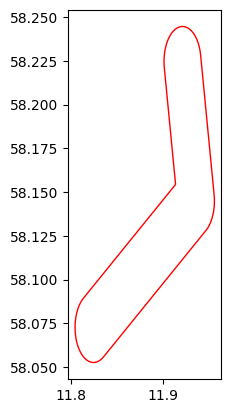

In [23]:
import osmnx as ox
import folium
import numpy as np
from shapely.geometry import LineString
import geopandas as gpd
import matplotlib.pyplot as plt

# 🚆 **Step 1: Define Train Stations (Lat, Lon)**
stations = {
    "Stenungsund Station": (58.072592, 11.824760),
    "Svenshögen Station": (58.144868, 11.935715),
    "Ljungskile Station": (58.224681, 11.921123)
}

# 🚆 **Step 2: Create a Polyline Between Stations**
polyline = LineString([(lon, lat) for lat, lon in stations.values()])

# 🚆 **Step 3: Buffer the Polyline to Create a Query Area**
buffered_polyline = polyline.buffer(0.02)  # Increase to ~1km width

# 🚀 **Debugging: Show the Buffered Area**
gdf = gpd.GeoDataFrame(geometry=[buffered_polyline], crs="EPSG:4326")
gdf.plot(edgecolor="red", facecolor="none")
plt.show()

# 🚆 **Step 4: Query Railways Inside This Area**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

# 🚆 **Step 5: Create a Folium Map**
mid_lat, mid_lon = (stations["Stenungsund Station"][0] + stations["Ljungskile Station"][0]) / 2, \
                   (stations["Stenungsund Station"][1] + stations["Ljungskile Station"][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=11)

# **Plot railway tracks**
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        folium.PolyLine([(lat, lon) for lon, lat in row.geometry.coords], color="black", weight=2).add_to(map_route)

# **Add Station Markers**
for name, coords in stations.items():
    folium.Marker(coords, popup=name, icon=folium.Icon(color="green")).add_to(map_route)

# **Draw the Buffered Area**
folium.PolyLine([(y, x) for x, y in buffered_polyline.exterior.coords], color="blue", weight=3, opacity=0.6).add_to(map_route)

# **Display the Map**
map_route


In [26]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point

def add_route_to_map(m, route_coords, color="blue", weight=5, opacity=1):
    """Add the computed railway route to the map."""
    folium.PolyLine(route_coords, color=color, weight=weight, opacity=opacity).add_to(m)

def add_marker_to_map(m, lat, lon, popup_text, icon_color="green"):
    """Add station markers to the Folium map."""
    folium.Marker(location=[lat, lon], popup=popup_text, icon=folium.Icon(color=icon_color)).add_to(m)

# 🚆 **Step 1: Define Train Station Coordinates**
stations = {
    "Stenungsund Station": (58.072592, 11.824760),
    "Svenshögen Station": (58.144868, 11.935715),
    "Ljungskile Station": (58.224681, 11.921123)
}

# 🔥 **Step 2: Create a Buffered Search Area**
buffer_width = 0.02  # ~1km width
polyline = LineString([(lon, lat) for lat, lon in stations.values()])
buffered_polyline = polyline.buffer(buffer_width)

# 🔥 **Step 3: Fetch Railway Data Inside the Buffer**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

# 🔥 **Step 4: Convert Railway Lines to a Graph**
G = nx.Graph()

for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]  # Reverse lat/lon order
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = Point(lat1, lon1).distance(Point(lat2, lon2))  # FIXED: Using points instead of line
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
try:
    start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations["Stenungsund Station"])))
    end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations["Ljungskile Station"])))

    route = nx.shortest_path(G, start_node, end_node, weight="weight")
    route_coords = list(route)
except nx.NetworkXNoPath:
    print("No railway path found between the two stations.")
    route_coords = []

# 🔥 **Step 7: Create the Map**
mid_lat, mid_lon = (stations["Stenungsund Station"][0] + stations["Ljungskile Station"][0]) / 2, \
                   (stations["Stenungsund Station"][1] + stations["Ljungskile Station"][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the railway path**
if route_coords:
    add_route_to_map(map_route, route_coords, color="darkblue")

# **Add Station Markers**
for name, coords in stations.items():
    add_marker_to_map(map_route, coords[0], coords[1], name, "blue")

# **Display the Map**
map_route


KeyError: 'Ljungskile station'

In [22]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
import requests
from shapely.geometry import LineString, Point

# 🎯 Define Origin and Destination IDs
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

# 🚀 Fetch trip data
trip_data = requests.get(f"https://api.resrobot.se/v2.1/trip?format=json&originId={origin_id}&destId={destination_id}&passlist=true&showPassingPoints=true&accessId={{YOUR_API_KEY}}").json()

if not trip_data or "Trip" not in trip_data:
    raise ValueError("🚨 API returned no trip data. Check origin/destination IDs!")

# 🚀 Extract intermediate stops from API response
if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    stations = {}
    
    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]
            if isinstance(stops, dict):
                stops = [stops]
            
            for stop in stops:
                stop_id = stop["id"]
                stop_name = stop["name"]
                stop_lat = stop.get("lat")
                stop_lon = stop.get("lon")
                
                if stop_lat and stop_lon:
                    stations[stop_name] = (float(stop_lat), float(stop_lon))

    print("\n✅ Intermediate Stops Along the Route:")
    for stop_name in stations.keys():
        print(stop_name)
else:
    print("🚨 No trips found in API response!")
    stations = {}

# 🔥 **Step 2: Create a Buffered Search Area**
if stations:
    buffer_width = 0.02  # ~1km width
    polyline = LineString([(lon, lat) for lat, lon in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width)

    # 🔥 **Step 3: Fetch Railway Data Inside the Buffer**
    railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

    # 🔥 **Step 4: Convert Railway Lines to a Graph**
    G = nx.Graph()
    
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]  # Reverse lat/lon order
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

    # 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
    try:
        start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[next(iter(stations))])))
        end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[next(reversed(stations))])))
        
        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = list(route)
    except nx.NetworkXNoPath:
        print("No railway path found between the two stations.")
        route_coords = []

    # 🔥 **Step 7: Create the Map**
    mid_lat, mid_lon = (list(stations.values())[0][0] + list(stations.values())[-1][0]) / 2, \
                       (list(stations.values())[0][1] + list(stations.values())[-1][1]) / 2

    map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

    # **Plot only the railway path**
    if route_coords:
        folium.PolyLine(route_coords, color="darkblue", weight=5, opacity=1).add_to(map_route)
    
    # **Add Station Markers**
    for name, coords in stations.items():
        folium.Marker(location=[coords[0], coords[1]], popup=name, icon=folium.Icon(color="blue")).add_to(map_route)
    
    # **Display the Map**
    map_route


Network or HTTP error: 401 Client Error: Unauthorized for url: https://api.resrobot.se/v2.1/trip?format=json&originId=740000014&destId=740000098&passlist=true&showPassingPoints=true&accessId=your_api_key_here


ValueError: 🚨 API returned no trip data. Check origin/destination IDs!

In [21]:
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 Use Correct Stop IDs
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

# 🚀 Fetch trip data
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# ✅ Debugging: Print the response
if not trip_data or "Trip" not in trip_data:
    raise ValueError("🚨 API returned no trip data. Check origin/destination IDs!")

print("✅ Trip Data Received:", trip_data)

# 🚀 Extract intermediate stops from ResRobot trip data
if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    
    # 📌 Extract all trip legs
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    # 🏷️ Collect all stop names
    all_stops = []
    
    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]
            
            # Ensure stops are in list format
            if isinstance(stops, dict):
                stops = [stops]
            
            for stop in stops:
                stop_name = stop["name"]
                all_stops.append(stop_name)

    # 🔥 Print all stop names
    print("\n✅ Intermediate Stops Along the Route:")
    for stop in all_stops:
        print(stop)

else:
    print("🚨 No trips found in API response!")



✅ Trip Data Received: {'Trip': [{'Origin': {'name': 'Stenungsund station', 'type': 'ST', 'id': 'A=1@O=Stenungsund station@X=11824761@Y=58072590@U=1@L=740000014@', 'extId': '740000014', 'lon': 11.824761, 'lat': 58.07259, 'routeIdx': 4, 'prognosisType': 'PROGNOSED', 'time': '16:21:00', 'date': '2025-01-28', 'minimumChangeDuration': 'PT5M'}, 'Destination': {'name': 'Ljungskile station (Uddevalla kn)', 'type': 'ST', 'id': 'A=1@O=Ljungskile station (Uddevalla kn)@X=11921126@Y=58224678@U=1@L=740000098@', 'extId': '740000098', 'lon': 11.921126, 'lat': 58.224678, 'routeIdx': 6, 'prognosisType': 'PROGNOSED', 'time': '16:37:00', 'date': '2025-01-28', 'minimumChangeDuration': 'PT5M'}, 'ServiceDays': [{'planningPeriodBegin': '2025-01-02', 'planningPeriodEnd': '2025-06-15', 'sDaysR': 'varje dag', 'sDaysB': '000001FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF8'}], 'LegList': {'Leg': [{'Origin': {'name': 'Stenungsund station', 'type': 'ST', 'id': 'A=1@O=Stenungsund station@X=11824761@Y=58072590@U=1@L=740000014

In [13]:
# 🚀 Extract intermediate stops from ResRobot trip data
if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    
    # 📌 Extract all trip legs
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    # 🏷️ Collect all stop names
    all_stops = []
    
    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]
            
            # Ensure stops are in list format
            if isinstance(stops, dict):
                stops = [stops]
            
            for stop in stops:
                stop_name = stop["name"]
                all_stops.append(stop_name)

    # 🔥 Print all stop names
    print("\n✅ Intermediate Stops Along the Route:")
    for stop in all_stops:
        print(stop)

else:
    print("🚨 No trips found in API response!")



✅ Intermediate Stops Along the Route:
Stenungsund station
Svenshögen station (Stenungsund kn)
Ljungskile station (Uddevalla kn)


In [27]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot
import pandas as pd

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# ✅ Load stops.txt dynamically to match stop_id with coordinates
def load_stops(file_path="../data/stops.txt"):
    """Load stop data from a local file"""
    columns = ["stop_id", "stop_name", "stop_lat", "stop_lon", "location_type"]
    return pd.read_csv(file_path, names=columns, header=0)

stops_df = load_stops()

# ✅ Create a dictionary {stop_id: (lat, lon)}
stop_id_dict = dict(zip(stops_df["stop_id"], zip(stops_df["stop_lat"], stops_df["stop_lon"])))

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    stations = {}

    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]

            # Ensure stops are in list format
            if isinstance(stops, dict):
                stops = [stops]  # Convert single stop to list
            
            for stop in stops:
                stop_name = stop.get("name", "Unknown")
                stop_id = stop.get("extId", "N/A")
                stop_lat = stop.get("lat")
                stop_lon = stop.get("lon")

                if stop_lat is not None and stop_lon is not None:
                    stations[stop_id] = (float(stop_lat), float(stop_lon))
                else:
                    print(f"🚨 Warning: Stop {stop_name} (ID {stop_id}) is missing coordinates!")

    if not stations:
        raise ValueError("🚨 No valid station coordinates found!")  # Ensure it fails with clear reason

    print("\n✅ Intermediate Stops Along the Route:")
    for stop_id, coords in stations.items():
        print(f"{stop_id}: {coords}")

else:
    raise ValueError("🚨 API returned no trip data. Check origin/destination IDs!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
valid_coords = [(lon, lat) for lat, lon in stations.values() if pd.notna(lat) and pd.notna(lon)]
if not valid_coords:
    raise ValueError("🚨 No valid coordinates found for buffering!")

polyline = LineString(valid_coords)
buffered_polyline = polyline.buffer(0.02)  # ~1km width

# ✅ **Step 3: Fetch Railway & Road Data (Now Safe to Query)**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

# 🔥 **Step 4: Convert Data into Graph**
G = nx.Graph()
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = Point(lat1, lon1).distance(Point(lat2, lon2))
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
try:
    start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[origin_id])))
    end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[destination_id])))

    route = nx.shortest_path(G, start_node, end_node, weight="weight")
    route_coords = list(route)
except nx.NetworkXNoPath:
    print("No railway path found between the two stations.")
    route_coords = []

# 🔥 **Step 6: Create the Map**
mid_lat, mid_lon = (stations[origin_id][0] + stations[destination_id][0]) / 2, \
                   (stations[origin_id][1] + stations[destination_id][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the railway path**
if route_coords:
    folium.PolyLine(route_coords, color="darkblue", weight=5, opacity=1).add_to(map_route)

# **Add Station Markers**
for stop_id, coords in stations.items():
    folium.Marker(location=[coords[0], coords[1]], popup=stop_id, icon=folium.Icon(color="blue")).add_to(map_route)

# **Display the Map**
map_route



✅ Intermediate Stops Along the Route:
740000014: (58.07259, 11.824761)
740070269: (58.075844, 11.827539)
740015742: (58.082154, 11.830191)
740060342: (58.086559, 11.831243)
740060313: (58.099549, 11.845176)
740015756: (58.10283, 11.850363)
740060314: (58.106515, 11.851235)
740060315: (58.115675, 11.854767)
740060320: (58.118714, 11.854426)
740060318: (58.120583, 11.854785)
740060316: (58.122093, 11.855954)
740060317: (58.124799, 11.858003)
740060324: (58.127739, 11.855756)
740060322: (58.131011, 11.850758)
740015757: (58.134211, 11.843603)
740060329: (58.137159, 11.865159)
740060325: (58.148153, 11.866768)
740060328: (58.149708, 11.874804)
740060326: (58.15058, 11.881133)
740041178: (58.154032, 11.886382)
740041179: (58.157996, 11.885456)
740016125: (58.168703, 11.892864)
740041431: (58.182285, 11.900747)
740041432: (58.183625, 11.903183)
740041433: (58.189567, 11.911247)
740041415: (58.201199, 11.914806)
740041378: (58.213613, 11.916191)
740000098: (58.224678, 11.921126)
No railway p

In [39]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot
import pandas as pd
import time

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# ✅ Load stops.txt dynamically to match stop_id with coordinates
def load_stops(file_path="../data/stops.txt"):
    """Load stop data from a local file"""
    columns = ["stop_id", "stop_name", "stop_lat", "stop_lon", "location_type"]
    return pd.read_csv(file_path, names=columns, header=0)

stops_df = load_stops()

# ✅ Create a dictionary {stop_id: (lat, lon)}
stop_id_dict = dict(zip(stops_df["stop_id"], zip(stops_df["stop_lat"], stops_df["stop_lon"])))


# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740015635"  # Mölndal sjukhus
destination_id = "740059809"  # Bifrost

trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    stations = {}
    transport_info = []
    transport_mode = None

    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]

            # Ensure stops are in list format
            if isinstance(stops, dict):
                stops = [stops]  # Convert single stop to list
            
            for stop in stops:
                stop_name = stop.get("name", "Unknown")
                stop_id = stop.get("extId", "N/A")
                stop_lat = stop.get("lat")
                stop_lon = stop.get("lon")
                transport_type = leg["Product"][0]["catOutL"] if "Product" in leg else "Unknown"
                
                # Track transport mode and identify if it's Spårvagn (tram)
                if transport_mode is None:
                    transport_mode = transport_type  # Assign transport mode for filtering

                # Skip tram stops for train pathfinding
                if 'spårvagn' in transport_type.lower():
                    transport_type = 'train'  # Treat trams the same as trains for pathfinding
                    print(f"🚋 Treating tram stop {stop_name} (ID {stop_id}) as a train.")

                if stop_lat is not None and stop_lon is not None:
                    if stop_id not in stations:  # Avoid duplicates
                        stations[stop_id] = (float(stop_lat), float(stop_lon))
                        transport_info.append((stop_name, stop_id, transport_type))
                    else:
                        print(f"🚨 Duplicate stop {stop_name} (ID {stop_id}) skipped.")
            
            # Track the transition to the next leg
            print(f"🚉 Transport mode: {transport_type}")
            print(f"🚉 Transfer from {stop_name} to the next leg.")

    if not stations:
        raise ValueError("🚨 No valid station coordinates found!")  # Ensure it fails with clear reason

    print("\n✅ Intermediate Stops Along the Route:")
    for stop_name, stop_id, transport in transport_info:
        print(f"{stop_name} ({stop_id}) - {transport}")

else:
    raise ValueError("🚨 API returned no trip data. Check origin/destination IDs!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
valid_coords = [(lon, lat) for lat, lon in stations.values() if pd.notna(lat) and pd.notna(lon)]
if not valid_coords:
    raise ValueError("🚨 No valid coordinates found for buffering!")

polyline = LineString(valid_coords)
buffered_polyline = polyline.buffer(0.02)  # ~1km width

# ✅ **Step 3: Fetch Railway & Road Data (Now Safe to Query)**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
roads = ox.features_from_polygon(buffered_polyline, tags={"highway": True})

# 🔥 **Step 4: Convert Data into Graphs**
def create_graph(osm_data):
    G = nx.Graph()
    for _, row in osm_data.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
    return G

# 🚆 Train Network Graph
rail_graph = create_graph(railways)

# 🚗 Road Network Graph
drive_graph = create_graph(roads)

# 🔥 **Step 5: Find Shortest Paths**
def find_shortest_path(G, station_list):
    """Find the shortest path through all stops sequentially, ensuring it follows railway tracks."""
    full_route = []
    
    for i in range(len(station_list) - 1):
        start_id = station_list[i]
        end_id = station_list[i + 1]
        start_coords = stations[start_id]
        end_coords = stations[end_id]
        
        try:
            # Ensure start and end nodes are railway nodes
            railway_nodes = [node for node in G.nodes if isinstance(node, tuple)]
            
            start_node = min(railway_nodes, key=lambda node: Point(node).distance(Point(start_coords)))
            end_node = min(railway_nodes, key=lambda node: Point(node).distance(Point(end_coords)))

            sub_route = nx.shortest_path(G, start_node, end_node, weight="weight")
            full_route.extend(sub_route[:-1])
        except nx.NetworkXNoPath:
            print(f"🚨 No path found between {start_id} and {end_id}")

    full_route.append(end_coords)
    return full_route

station_ids = list(stations.keys())

# 🚆 Compute route (now including trams as trains)
route = find_shortest_path(rail_graph, station_ids)

# 🔥 **Step 6: Create the Map**
map_route = folium.Map(location=[stations[origin_id][0], stations[origin_id][1]], zoom_start=10)

if route:
    folium.PolyLine(route, color="darkblue", weight=5, opacity=1).add_to(map_route)

for stop_name, stop_id, transport in transport_info:
    folium.Marker(location=stations[stop_id], popup=f"{stop_name} ({transport})", icon=folium.Icon(color="blue")).add_to(map_route)

map_route


🚉 Transport mode: Länstrafik - Spårväg
🚉 Transfer from Mölndals Innerstad to the next leg.
🚨 Duplicate stop Mölndals Innerstad (ID 740015633) skipped.
🚉 Transport mode: Länstrafik - Buss
🚉 Transfer from Bifrost (Mölndal kn) to the next leg.

✅ Intermediate Stops Along the Route:
Mölndal Sjukhus (740015635) - Länstrafik - Spårväg
Mölndals Innerstad (740015633) - Länstrafik - Spårväg
Storgatan (Mölndal kn) (740059781) - Länstrafik - Buss
Fässbergsskolan (Mölndal kn) (740059805) - Länstrafik - Buss
Jungfruplatsen (Mölndal kn) (740059782) - Länstrafik - Buss
Bifrost (Mölndal kn) (740059809) - Länstrafik - Buss


NameError: name 'tram_data' is not defined

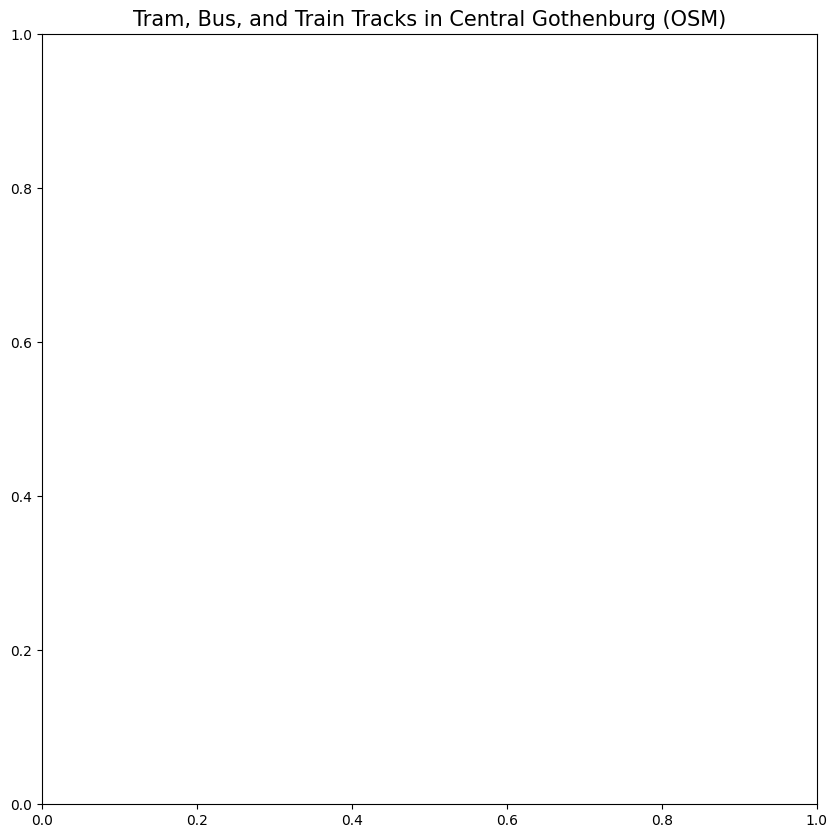

In [20]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define central Gothenburg (Göteborg) coordinates for the search radius
central_goteborg_coords = (57.7089, 11.9746)

# Define the search radius in meters (1000 meters = 1km)
radius_in_meters = 1000

# Create a Point from the central Gothenburg coordinates
point = Point(central_goteborg_coords[1], central_goteborg_coords[0])

# Create a buffered area with the specified radius (1km)
buffered_area = point.buffer(radius_in_meters / 111320)  # Convert meters to degrees approximately

# Fetch tram (spårvagn), bus (bus), and train (rail) data from OSM within the buffered area
transport_data = ox.features_from_polygon(buffered_area, tags={"railway": "tram"})
train_data = ox.features_from_polygon(buffered_area, tags={"railway": "rail"})

# Create a plot to see all the transport data
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title("Tram, Bus, and Train Tracks in Central Gothenburg (OSM)", fontsize=15)

# Plot the tram data on the map (blue)
tram_data.plot(ax=ax, color="blue", linewidth=2, label="Tram")

# Plot the bus stops (green)
bus_data.plot(ax=ax, color="green", markersize=10, label="Bus Stop")

# Plot the train tracks (dark red)
train_data.plot(ax=ax, color="darkred", linewidth=2, label="Train")

# Add central Gothenburg marker for reference
ax.plot(central_goteborg_coords[1], central_goteborg_coords[0], marker="o", color="red", markersize=8)

# Display the legend
ax.legend()

plt.show()


In [52]:
import osmnx as ox
import folium
import networkx as nx
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot
import pandas as pd

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# ✅ Load stops.txt dynamically to match stop_id with coordinates
def load_stops(file_path="../data/stops.txt"):
    """Load stop data from a local file"""
    columns = ["stop_id", "stop_name", "stop_lat", "stop_lon", "location_type"]
    return pd.read_csv(file_path, names=columns, header=0)

stops_df = load_stops()

# ✅ Create a dictionary {stop_id: (lat, lon)}
stop_id_dict = dict(zip(stops_df["stop_id"], zip(stops_df["stop_lat"], stops_df["stop_lon"])))

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
    first_trip = trip_data["Trip"][0]  # Get the first available trip
    legs = first_trip["LegList"]["Leg"]
    if isinstance(legs, dict):  # Handle single-leg trips
        legs = [legs]
    
    stations = {}
    transport_info = []
    transport_mode = None

    # Handle each leg (to handle transfers)
    for leg in legs:
        if "Stops" in leg and "Stop" in leg["Stops"]:
            stops = leg["Stops"]["Stop"]

            # Ensure stops are in list format
            if isinstance(stops, dict):
                stops = [stops]  # Convert single stop to list
            
            # Process each stop and append it to stations
            for stop in stops:
                stop_name = stop.get("name", "Unknown")
                stop_id = stop.get("extId", "N/A")
                stop_lat = stop.get("lat")
                stop_lon = stop.get("lon")
                transport_type = leg["Product"][0]["catOutL"] if "Product" in leg else "Unknown"
                
                if transport_mode is None:
                    transport_mode = transport_type  # Assign transport mode for filtering
                
                if stop_lat is not None and stop_lon is not None:
                    stations[stop_id] = (float(stop_lat), float(stop_lon))
                    transport_info.append((stop_name, stop_id, transport_type))
                else:
                    print(f"🚨 Warning: Stop {stop_name} (ID {stop_id}) is missing coordinates!")

    if not stations:
        raise ValueError("🚨 No valid station coordinates found!")  # Ensure it fails with clear reason

    # Debugging: print intermediate stops
    print("\n✅ Intermediate Stops Along the Route:")
    for stop_name, stop_id, transport in transport_info:
        print(f"{stop_name} ({stop_id}) - {transport}")

else:
    raise ValueError("🚨 API returned no trip data. Check origin/destination IDs!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
valid_coords = [(lon, lat) for lat, lon in stations.values() if pd.notna(lat) and pd.notna(lon)]
if not valid_coords:
    raise ValueError("🚨 No valid coordinates found for buffering!")

polyline = LineString(valid_coords)
buffered_polyline = polyline.buffer(0.02)  # ~1km width

# ✅ **Step 3: Fetch Railway, Tram, and Road Data from OSM (Using Buffered Area for query)**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})  # Train routes
tram_data = ox.features_from_polygon(buffered_polyline, tags={"railway": "tram"})  # Tram routes
roads = ox.features_from_polygon(buffered_polyline, tags={"highway": True})  # Roads for bus/vehicle routes

# 🔥 **Step 4: Convert Data into Graphs**
def create_graph(osm_data):
    G = nx.Graph()
    for _, row in osm_data.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
    return G

# 🚆 Train Network Graph
rail_graph = create_graph(railways)

# 🚋 Tram Network Graph
tram_graph = create_graph(tram_data)

# 🚗 Road Network Graph (for buses)
drive_graph = create_graph(roads)

# 🔥 **Step 5: Find Shortest Paths**
def find_shortest_path(G, station_list):
    """Find the shortest path through all stops sequentially."""
    full_route = []
    for i in range(len(station_list) - 1):
        start_id = station_list[i]
        end_id = station_list[i + 1]
        start_coords = stations[start_id]
        end_coords = stations[end_id]
        try:
            start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(start_coords)))
            end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(end_coords)))
            sub_route = nx.shortest_path(G, start_node, end_node, weight="weight")
            full_route.extend(sub_route[:-1])
        except nx.NetworkXNoPath:
            print(f"🚨 No path found between {start_id} and {end_id}")
    full_route.append(end_coords)
    return full_route

station_ids = list(stations.keys())

# Determine route based on transport mode
if transport_mode and "train" in transport_mode.lower():
    route = find_shortest_path(rail_graph, station_ids)  # Train path
elif transport_mode and "spårväg" in transport_mode.lower():  # Tram
    route = find_shortest_path(tram_graph, station_ids)  # Tram path
else:
    route = find_shortest_path(drive_graph, station_ids)  # For buses and other road transport

# 🔥 **Step 6: Create the Map**
map_route = folium.Map(location=[stations[origin_id][0], stations[origin_id][1]], zoom_start=10)

if route:
    folium.PolyLine(route, color="darkblue" if "train" in transport_mode.lower() or "spårväg" in transport_mode.lower() else "red", weight=5, opacity=1).add_to(map_route)

# Add all stops to the map
for stop_name, stop_id, transport in transport_info:
    folium.Marker(location=stations[stop_id], popup=f"{stop_name} ({transport})", icon=folium.Icon(color="blue")).add_to(map_route)

map_route



✅ Intermediate Stops Along the Route:
Stenungsund station (740000014) - Länstrafik - Tåg
Svenshögen station (Stenungsund kn) (740000320) - Länstrafik - Tåg
Ljungskile station (Uddevalla kn) (740000098) - Länstrafik - Tåg


InsufficientResponseError: No matching features. Check query location, tags, and log.

In [49]:
import json
from backend.connect_to_api import ResRobot

# Initialize ResRobot API
resrobot = ResRobot()

# Define the origin and destination
origin_id = "740015635"  # Mölndal Sjukhus
destination_id = "740059809"  # Bifrost

# Fetch the trip details
trip_details = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# Check if the trip data is valid and exists
if trip_details and "Trip" in trip_details and len(trip_details["Trip"]) > 0:
    # Fetch the first trip from the response
    next_departure = trip_details["Trip"][0]

    # Output the raw trip data in JSON format
    print("Raw Trip Data:")
    print(json.dumps(next_departure, indent=4))  # Pretty-print the full JSON structure
else:
    print("🚨 No trip data found for the given origin and destination. Please check the IDs.")


Raw Trip Data:
{
    "Origin": {
        "name": "M\u00f6lndal Sjukhus",
        "type": "ST",
        "id": "A=1@O=M\u00f6lndal Sjukhus@X=12013472@Y=57661450@U=1@L=740015635@",
        "extId": "740015635",
        "lon": 12.013472,
        "lat": 57.66145,
        "routeIdx": 25,
        "prognosisType": "PROGNOSED",
        "time": "17:33:00",
        "date": "2025-01-28",
        "minimumChangeDuration": "PT5M"
    },
    "Destination": {
        "name": "Bifrost (M\u00f6lndal kn)",
        "type": "ST",
        "id": "A=1@O=Bifrost (M\u00f6lndal kn)@X=11997813@Y=57661567@U=1@L=740059809@",
        "extId": "740059809",
        "lon": 11.997813,
        "lat": 57.661567,
        "routeIdx": 9,
        "prognosisType": "PROGNOSED",
        "time": "17:49:00",
        "date": "2025-01-28",
        "minimumChangeDuration": "PT5M"
    },
    "ServiceDays": [
        {
            "planningPeriodBegin": "2025-01-02",
            "planningPeriodEnd": "2025-06-15",
            "sDaysR": "

In [72]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point

def add_route_to_map(m, route_coords, color="blue", weight=5, opacity=1):
    """Add the computed railway route to the map."""
    folium.PolyLine(route_coords, color=color, weight=weight, opacity=opacity).add_to(m)

def add_marker_to_map(m, lat, lon, popup_text, icon_color="green"):
    """Add station markers to the Folium map."""
    folium.Marker(location=[lat, lon], popup=popup_text, icon=folium.Icon(color=icon_color)).add_to(m)

# 🚆 **Step 1: Define Train Station Coordinates**
stations = {
    "Stenungsund Station": (58.072592, 11.824760),
    "Svenshögen Station": (58.144868, 11.935715),
    "Ljungskile Station": (58.224681, 11.921123)
}

# 🔥 **Step 2: Create a Buffered Search Area**
buffer_width = 0.02  # ~1km width
polyline = LineString([(lon, lat) for lat, lon in stations.values()])
buffered_polyline = polyline.buffer(buffer_width)

# 🔥 **Step 3: Fetch Railway Data Inside the Buffer**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

# 🔥 **Step 4: Convert Railway Lines to a Graph**
G = nx.Graph()

for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]  # Reverse lat/lon order
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = Point(lat1, lon1).distance(Point(lat2, lon2))  # FIXED: Using points instead of line
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
try:
    start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations["Stenungsund Station"])))
    end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations["Ljungskile Station"])))

    route = nx.shortest_path(G, start_node, end_node, weight="weight")
    route_coords = list(route)
except nx.NetworkXNoPath:
    print("No railway path found between the two stations.")
    route_coords = []

# 🔥 **Step 7: Create the Map**
mid_lat, mid_lon = (stations["Stenungsund Station"][0] + stations["Ljungskile Station"][0]) / 2, \
                   (stations["Stenungsund Station"][1] + stations["Ljungskile Station"][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the railway path**
if route_coords:
    add_route_to_map(map_route, route_coords, color="darkblue")

# **Add Station Markers**
for name, coords in stations.items():
    add_marker_to_map(map_route, coords[0], coords[1], name, "blue")

# **Display the Map**
map_route


In [82]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot
import pandas as pd
import time

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

def extract_route(trip_data):
    """Extracts a full route, handling both direct and multi-leg trips."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]  # Get the first available trip
        legs = first_trip["LegList"].get("Leg", [])
        
        if isinstance(legs, dict):  # Handle single-leg trips
            legs = [legs]
        
        route_stations = []
        transport_modes = set()
        
        for i, leg in enumerate(legs):
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])
            transport_type = leg["Product"][0]["catCode"] if "Product" in leg else "unknown"
            transport_modes.add(transport_type)
            
            if isinstance(stops, dict):
                stops = [stops]  # Handle single stop
            
            segment_stations = [(origin["extId"], origin["lat"], origin["lon"])] + \
                               [(stop["extId"], stop["lat"], stop["lon"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"])]
            
            route_stations.extend(segment_stations)
        
        print("🚆 Extracted route:", route_stations)
        print(f"🛣️ Detected Transport Modes: {transport_modes}")
        return route_stations, transport_modes
    return None, None  # No valid trip found

route_station_ids, transport_modes = extract_route(trip_data)

if route_station_ids:
    print(f"🔍 Extracted Station Data: {route_station_ids}")
    stations = {stop[0]: (stop[1], stop[2]) for stop in route_station_ids}
    
    if not stations:
        raise ValueError("🚨 No valid station coordinates found!")
else:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
buffer_width = 0.02  # ~1km width
polyline = LineString([(lon, lat) for lat, lon in stations.values()])
buffered_polyline = polyline.buffer(buffer_width)

# 🔥 **Step 3: Fetch Road Network Instead of Rail**
road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")

# 🔥 **Step 4: Convert Road Network to Graph**
G = road_network

# 🔥 **Step 5: Find the Shortest Path on the Road Network**
try:
    start_lat, start_lon = stations[origin_id]
    end_lat, end_lon = stations[destination_id]
    
    start_node = ox.distance.nearest_nodes(G, X=start_lon, Y=start_lat)
    end_node = ox.distance.nearest_nodes(G, X=end_lon, Y=end_lat)
    
    route = nx.shortest_path(G, start_node, end_node, weight="length")
    route_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in route]
except nx.NetworkXNoPath:
    print("No road path found between the two stations.")
    route_coords = []

# 🔥 **Step 6: Create the Map**
mid_lat, mid_lon = (stations[origin_id][0] + stations[destination_id][0]) / 2, \
                   (stations[origin_id][1] + stations[destination_id][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the road path**
if route_coords:
    folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_route)

# **Add Station Markers**
for name, coords in stations.items():
    folium.Marker(location=[coords[0], coords[1]], popup=name, icon=folium.Icon(color="blue")).add_to(map_route)

# **Display the Map**
map_route

🚆 Extracted route: [('740000014', 58.07259, 11.824761), ('740000014', 58.07259, 11.824761), ('740000320', 58.144872, 11.935715), ('740000098', 58.224678, 11.921126), ('740000098', 58.224678, 11.921126)]
🛣️ Detected Transport Modes: {'4'}
🔍 Extracted Station Data: [('740000014', 58.07259, 11.824761), ('740000014', 58.07259, 11.824761), ('740000320', 58.144872, 11.935715), ('740000098', 58.224678, 11.921126), ('740000098', 58.224678, 11.921126)]


In [81]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot
import pandas as pd
import time

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station

trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

def extract_route(trip_data):
    """Extracts a full route, handling both direct and multi-leg trips."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]  # Get the first available trip
        legs = first_trip["LegList"].get("Leg", [])
        
        if isinstance(legs, dict):  # Handle single-leg trips
            legs = [legs]
        
        route_stations = []
        transport_modes = set()
        
        for i, leg in enumerate(legs):
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])
            transport_type = leg["Product"][0]["catCode"] if "Product" in leg else "unknown"
            transport_modes.add(transport_type)
            
            if isinstance(stops, dict):
                stops = [stops]  # Handle single stop
            
            segment_stations = [(origin["extId"], origin["lat"], origin["lon"])] + \
                               [(stop["extId"], stop["lat"], stop["lon"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"])]
            
            route_stations.extend(segment_stations)
        
        print("🚆 Extracted route:", route_stations)
        print(f"🛣️ Detected Transport Modes: {transport_modes}")
        return route_stations, transport_modes
    return None, None  # No valid trip found

route_station_ids, transport_modes = extract_route(trip_data)

if route_station_ids:
    print(f"🔍 Extracted Station Data: {route_station_ids}")
    stations = {stop[0]: (stop[1], stop[2]) for stop in route_station_ids}
    
    if not stations:
        raise ValueError("🚨 No valid station coordinates found!")
else:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
buffer_width = 0.02  # ~1km width
polyline = LineString([(lon, lat) for lat, lon in stations.values()])
buffered_polyline = polyline.buffer(buffer_width)

# 🔥 **Step 3: Fetch Transport Data Based on Mode**
transport_networks = {}
if "4" in transport_modes:  # Train
    transport_networks["train"] = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
if "7" in transport_modes:  # Bus
    transport_networks["bus"] = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")
if "6" in transport_modes:  # Tram
    transport_networks["tram"] = ox.features_from_polygon(buffered_polyline, tags={"railway": "tram"})
if "1" in transport_modes:  # Drive
    transport_networks["drive"] = ox.graph_from_polygon(buffered_polyline, network_type="drive")

# 🔥 **Step 4: Convert Transport Networks to Graphs**
transport_graphs = {}
for mode, network in transport_networks.items():
    if isinstance(network, gpd.GeoDataFrame):  # Rail & Tram as GeodataFrame
        G = nx.Graph()
        for _, row in network.iterrows():
            if row.geometry.geom_type == "LineString":
                coords = list(row.geometry.coords)
                for i in range(len(coords) - 1):
                    lat1, lon1 = coords[i][1], coords[i][0]
                    lat2, lon2 = coords[i+1][1], coords[i+1][0]
                    dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                    G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
        transport_graphs[mode] = G
    else:
        transport_graphs[mode] = network  # Directly use OSMnx graphs for road-based networks

# 🔥 **Step 5: Find and Plot Paths for Each Mode**
mode_colors = {"train": "blue", "tram": "purple", "bus": "green", "drive": "red"}
full_route_coords = []

for mode, graph in transport_graphs.items():
    try:
        start_lat, start_lon = stations[origin_id]
        end_lat, end_lon = stations[destination_id]
        
        start_node = ox.distance.nearest_nodes(graph, X=start_lon, Y=start_lat)
        end_node = ox.distance.nearest_nodes(graph, X=end_lon, Y=end_lat)
        
        route = nx.shortest_path(graph, start_node, end_node, weight="length")
        route_coords = [(graph.nodes[node]["y"], graph.nodes[node]["x"]) for node in route]
        full_route_coords.extend(route_coords)
        folium.PolyLine(route_coords, color=mode_colors.get(mode, "black"), weight=5, opacity=1, tooltip=f"{mode} route").add_to(map_route)
    except Exception as e:
        print(f"🚨 Error processing {mode} path: {e}")

# 🔥 **Step 6: Create the Map**
mid_lat, mid_lon = (stations[origin_id][0] + stations[destination_id][0]) / 2, \
                   (stations[origin_id][1] + stations[destination_id][1]) / 2
map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

if route_coords:
    folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_route)

# **Add Station Markers**
for name, coords in stations.items():
    folium.Marker(location=[coords[0], coords[1]], popup=name, icon=folium.Icon(color="blue")).add_to(map_route)

# **Display the Map**
map_route


🚆 Extracted route: [('740000014', 58.07259, 11.824761), ('740000014', 58.07259, 11.824761), ('740000320', 58.144872, 11.935715), ('740000098', 58.224678, 11.921126), ('740000098', 58.224678, 11.921126)]
🛣️ Detected Transport Modes: {'4'}
🔍 Extracted Station Data: [('740000014', 58.07259, 11.824761), ('740000014', 58.07259, 11.824761), ('740000320', 58.144872, 11.935715), ('740000098', 58.224678, 11.921126), ('740000098', 58.224678, 11.921126)]
🚨 Error processing train path: 'crs'


# BASELINE RESROBOT TRAIN

In [80]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Train Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

def extract_train_route(trip_data):
    """Extracts train route, handling direct train journeys."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]  # Get first available trip
        legs = first_trip["LegList"].get("Leg", [])

        if isinstance(legs, dict):  # Handle single-leg trips
            legs = [legs]

        route_stations = []
        for leg in legs:
            if "Product" in leg and leg["Product"][0]["catCode"] == "4":  # Train only
                origin = leg["Origin"]
                destination = leg["Destination"]
                stops = leg.get("Stops", {}).get("Stop", [])

                if isinstance(stops, dict):
                    stops = [stops]  # Handle single stop

                segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])] + \
                                   [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                                   [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]
                
                route_stations.extend(segment_stations)

        print("🚆 Extracted train route:", route_stations)
        return route_stations
    return None  # No valid train trip found

route_station_ids = extract_train_route(trip_data)

if route_station_ids:
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in route_station_ids}
    
    if not stations:
        raise ValueError("🚨 No valid train station coordinates found!")
else:
    raise ValueError("🚨 No valid train route found. Check API response!")

# 🔥 **Step 2: Create a Buffered Search Area (Only with Valid Coordinates)**
buffer_width = 0.02  # ~1km width
polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
buffered_polyline = polyline.buffer(buffer_width)

# 🔥 **Step 3: Fetch Railway Data Inside the Buffer**
railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

# 🔥 **Step 4: Convert Railway Lines to a Graph**
G = nx.Graph()
for _, row in railways.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]  # Reverse lat/lon order
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = Point(lat1, lon1).distance(Point(lat2, lon2))  
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🔥 **Step 5: Find the Shortest Path on the Railway Graph**
try:
    start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[origin_id][:2])))
    end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[destination_id][:2])))

    route = nx.shortest_path(G, start_node, end_node, weight="weight")
    route_coords = list(route)
except nx.NetworkXNoPath:
    print("No railway path found between the two stations.")
    route_coords = []

# 🔥 **Step 6: Create the Map**
mid_lat, mid_lon = (stations[origin_id][0] + stations[destination_id][0]) / 2, \
                   (stations[origin_id][1] + stations[destination_id][1]) / 2

map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot only the railway path**
if route_coords:
    folium.PolyLine(route_coords, color="darkblue", weight=5, opacity=1, tooltip="Train Route").add_to(map_route)

# **Add Station Markers**
for name, coords in stations.items():
    folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}", 
                  icon=folium.Icon(color="blue")).add_to(map_route)

# **Display the Map**
map_route


🚆 Extracted train route: [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000320', 58.144872, 11.935715, 'Svenshögen station (Stenungsund kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)')]


# Buss Route resrobot BASELINE

In [90]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

def extract_road_route(trip_data):
    """Extracts all stops for plotting road-based travel."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]  # Get first available trip
        legs = first_trip["LegList"].get("Leg", [])

        if isinstance(legs, dict):  # Handle single-leg trips
            legs = [legs]

        route_stations = []

        for leg in legs:
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])

            if isinstance(stops, dict):
                stops = [stops]  # Handle single stop case

            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])]+ \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]

            route_stations.extend(segment_stations)

        print("🛣️ Extracted road route:", route_stations)
        return route_stations
    return None  # No valid road trip found

# 🚍 **Extract Stops for Road Plotting**
route_station_ids = extract_road_route(trip_data)

if route_station_ids:
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in route_station_ids}
    
    if not stations:
        raise ValueError("🚨 No valid road-based station coordinates found!")
else:
    raise ValueError("🚨 No valid road-based route found. Check API response!")

# 🔥 **Step 2: Create a Buffered Search Area (Better Road Alignment)**
buffer_width = 0.02  # Smaller buffer for better alignment
polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
buffered_polyline = polyline.buffer(buffer_width, cap_style=2, join_style=2)  # Flat ends

# 🔥 **Step 3: Fetch Road Network Data**
road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")

# 🔥 **Step 4: Process Road Travel**
def plot_road_routes(map_obj, road_network, stations, route_station_ids):
    """Plots road routes using OSM data between ResRobot stops."""
    for i in range(len(route_station_ids) - 1):
        start_lat, start_lon, _ = stations[route_station_ids[i][0]]
        end_lat, end_lon, _ = stations[route_station_ids[i + 1][0]]

        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)
            
            # Find the shortest path using the OSM road network
            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]

            # Draw the route on the map
            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_obj)

        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

# 🔥 **Step 5: Create the Map**
mid_lat, mid_lon = (stations[origin_id][0] + stations[destination_id][0]) / 2, \
                   (stations[origin_id][1] + stations[destination_id][1]) / 2
map_route = folium.Map(location=[mid_lat, mid_lon], zoom_start=10)

# **Plot road routes**
plot_road_routes(map_route, road_network, stations, route_station_ids)

# **Add Station Markers**
for name, coords in stations.items():
    folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}", 
                  icon=folium.Icon(color="blue")).add_to(map_route)

# **Display the Map**
map_route


🛣️ Extracted road route: [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000320', 58.144872, 11.935715, 'Svenshögen station (Stenungsund kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)')]


# ResRobot Seperation train/bus

In [98]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000098"  # Ljungskile Station
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

def extract_route(trip_data, transport_type):
    """Extracts train or road routes from ResRobot based on transport type."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]  # Get first available trip
        legs = first_trip["LegList"].get("Leg", [])

        if isinstance(legs, dict):  # Handle single-leg trips
            legs = [legs]

        route_stations = []
        for leg in legs:
            if "Product" in leg and leg["Product"][0]["catCode"] == transport_type:
                origin = leg["Origin"]
                destination = leg["Destination"]
                stops = leg.get("Stops", {}).get("Stop", [])

                if isinstance(stops, dict):
                    stops = [stops]  # Handle single stop case

                segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])] + \
                                   [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                                   [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]
                
                route_stations.extend(segment_stations)

        return route_stations if route_stations else None
    return None

# 🛣️ **Extract Stops for Road & Train**
road_stations = extract_route(trip_data, "7")  # Bus (roads)
train_stations = extract_route(trip_data, "4")  # Train (railways)

if not road_stations and not train_stations:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [(train_stations or road_stations)[0][1], (train_stations or road_stations)[0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    buffer_width = 0.02  # ~1km width
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width)

    railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})

    # Convert railways to a graph
    G = nx.Graph()
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

    try:
        start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[0][0]][:2])))
        end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[-1][0]][:2])))

        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = list(route)
        folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)

    except nx.NetworkXNoPath:
        print("🚨 No railway path found between stations.")

def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    buffer_width = 0.005
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width, cap_style=2, join_style=2)

    road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")

    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]

        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)

            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]

            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_obj)

        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

# 🔥 **Step 4: Execute Plotting**
if train_stations:
    plot_train_routes(map_route, train_stations)

if road_stations:
    plot_road_routes(map_route, road_stations)

# **Add Station Markers**
for station_list in [train_stations, road_stations]:
    if station_list:
        for name, coords in {stop[0]: (stop[1], stop[2], stop[3]) for stop in station_list}.items():
            folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}",
                          icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


# TESTING FOR MULTI-LEG

In [101]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000480"  # Ljungskile Station
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# 🔥 **Extract Route with Transfers Handling**
def extract_route_with_transfers(trip_data):
    """Extracts route data, handling transfers between different transport modes."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]
        legs = first_trip["LegList"].get("Leg", [])
        transfer_count = first_trip.get("transferCount", 0)

        if isinstance(legs, dict):
            legs = [legs]

        route_legs = []
        for leg in legs:
            # ✅ Safe extraction of transport type
            transport_type = leg.get("Product", [{}])[0].get("catCode", "unknown")
            
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])

            if isinstance(stops, dict):
                stops = [stops]

            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])] + \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]
            
            route_legs.append((transport_type, segment_stations))
        
        return route_legs, transfer_count
    return [], 0


# 🛣️ **Extract Stops for Road & Train Including Transfers**
route_legs, transfer_count = extract_route_with_transfers(trip_data)

if not route_legs:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [route_legs[0][1][0][1], route_legs[0][1][0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    buffer_width = 0.02
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width)

    railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
    
    G = nx.Graph()
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
    
    try:
        start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[0][0]][:2])))
        end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[-1][0]][:2])))
        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = list(route)
        folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)
    except nx.NetworkXNoPath:
        print("🚨 No railway path found between stations.")

def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    buffer_width = 0.005
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width, cap_style=2, join_style=2)
    
    road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")
    
    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]
        
        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)
            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]
            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Bus Route").add_to(map_obj)
        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

# 🔥 **Step 4: Execute Plotting for Each Leg**
for transport_type, stations in route_legs:
    if transport_type == "4":
        plot_train_routes(map_route, stations)
    elif transport_type == "7":
        plot_road_routes(map_route, stations)

# **Add Station Markers**
for _, stations in route_legs:
    for name, coords in {stop[0]: (stop[1], stop[2], stop[3]) for stop in stations}.items():
        folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}",
                      icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


🚨 No railway path found between stations.


In [102]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000480"  # Kampenhoff
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# 🔥 **Extract Route with Transfers Handling**
def extract_route_with_transfers(trip_data):
    """Extracts route data, handling transfers between different transport modes."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]
        legs = first_trip["LegList"].get("Leg", [])
        transfer_count = first_trip.get("transferCount", 0)

        if isinstance(legs, dict):
            legs = [legs]

        route_legs = []
        for leg in legs:
            transport_type = leg.get("Product", [{}])[0].get("catCode", "unknown")
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])
            
            if isinstance(stops, dict):
                stops = [stops]

            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])]+ \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]
            
            print(f"🔍 Transport Type: {transport_type}, Stops: {segment_stations}")
            route_legs.append((transport_type, segment_stations))
        
        return route_legs, transfer_count
    return [], 0

# 🛣️ **Extract Stops for Road & Train Including Transfers**
route_legs, transfer_count = extract_route_with_transfers(trip_data)

if not route_legs:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [route_legs[0][1][0][1], route_legs[0][1][0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    buffer_width = 0.02
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width)

    print(f"🚆 Buffered area for railway search: {buffered_polyline}")
    
    railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
    
    G = nx.Graph()
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
    
    try:
        start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[0][0]][:2])))
        end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[-1][0]][:2])))
        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = list(route)
        folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)
    except nx.NetworkXNoPath:
        print("🚨 No railway path found between stations.")


def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    buffer_width = 0.005
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width, cap_style=2, join_style=2)
    
    print(f"🛣️ Buffered area for road search: {buffered_polyline}")
    
    road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")
    
    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]
        
        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)
            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]
            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Bus Route").add_to(map_obj)
        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

# 🔥 **Step 4: Execute Plotting for Each Leg**
for transport_type, stations in route_legs:
    if transport_type == "4":
        plot_train_routes(map_route, stations)
    elif transport_type == "7":
        plot_road_routes(map_route, stations)

# **Add Station Markers**
for _, stations in route_legs:
    for name, coords in {stop[0]: (stop[1], stop[2], stop[3]) for stop in stations}.items():
        folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}",
                      icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


🔍 Transport Type: 4, Stops: [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000320', 58.144872, 11.935715, 'Svenshögen station (Stenungsund kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station')]
🔍 Transport Type: unknown, Stops: [('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740000480', 58.349916, 11.930438, 'Uddevalla Kampenhof')]
🚆 Buffered area for railway search: POLYGON ((11.91364802559379 58.15436590528222, 11.901452030546375 58.221081484194684, 11.901205523599021 58.2228962536774, 11.901126057513208 58.224725963788785, 11.901214298642648 58.22655527170534, 11.90146950705151 58.22836883797613, 11.925128507051511 58.35437083797613, 11.925584923821564 58.35627973881018, 11.926226247821045 58.358134711098366, 11.927046302749256 58.359917890

In [107]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000480"  # Kampenhoff
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# 🔥 **Extract Route with Transfers Handling**
def extract_route_with_transfers(trip_data):
    """Extracts route data, handling transfers between different transport modes."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]
        legs = first_trip["LegList"].get("Leg", [])
        transfer_count = first_trip.get("transferCount", 0)

        if isinstance(legs, dict):
            legs = [legs]

        route_legs = []
        for leg in legs:
            transport_type = leg.get("Product", [{}])[0].get("catCode", "unknown")
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])
            
            if isinstance(stops, dict):
                stops = [stops]

            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])]+ \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]
            
            print(f"🔍 Transport Type: {transport_type}, Stops: {segment_stations}")
            route_legs.append((transport_type, segment_stations))
        
        return route_legs, transfer_count
    return [], 0

# 🛣️ **Extract Stops for Road & Train Including Transfers**
route_legs, transfer_count = extract_route_with_transfers(trip_data)

if not route_legs:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [route_legs[0][1][0][1], route_legs[0][1][0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    buffer_width = 0.02
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width)

    print(f"🚆 Buffered area for railway search: {buffered_polyline}")
    
    railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
    
    G = nx.Graph()
    for _, row in railways.iterrows():
        if row.geometry.geom_type == "LineString":
            coords = list(row.geometry.coords)
            for i in range(len(coords) - 1):
                lat1, lon1 = coords[i][1], coords[i][0]
                lat2, lon2 = coords[i+1][1], coords[i+1][0]
                dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)
    
    try:
        start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[0][0]][:2])))
        end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(stations[train_stations[-1][0]][:2])))
        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = list(route)
        folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)
    except nx.NetworkXNoPath:
        print("🚨 No railway path found between stations.")


def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    buffer_width = 0.005
    polyline = LineString([(lon, lat) for lat, lon, _ in stations.values()])
    buffered_polyline = polyline.buffer(buffer_width, cap_style=2, join_style=2)
    
    print(f"🛣️ Buffered area for road search: {buffered_polyline}")
    
    road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")
    
    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]
        
        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)
            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]
            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Bus Route").add_to(map_obj)
        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

# 🔥 **Step 4: Execute Plotting for Each Leg**
for transport_type, stations in route_legs:
    if transport_type == "4":
        plot_train_routes(map_route, stations)
    elif transport_type == "7":
        plot_road_routes(map_route, stations)

# **Add Station Markers**
for _, stations in route_legs:
    for name, coords in {stop[0]: (stop[1], stop[2], stop[3]) for stop in stations}.items():
        folium.Marker(location=[coords[0], coords[1]], popup=f"{name}: {coords[2]}",
                      icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


🔍 Transport Type: 4, Stops: [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000320', 58.144872, 11.935715, 'Svenshögen station (Stenungsund kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station')]
🔍 Transport Type: unknown, Stops: [('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740000480', 58.349916, 11.930438, 'Uddevalla Kampenhof')]
🚆 Buffered area for railway search: POLYGON ((11.91364802559379 58.15436590528222, 11.901452030546375 58.221081484194684, 11.901205523599021 58.2228962536774, 11.901126057513208 58.224725963788785, 11.901214298642648 58.22655527170534, 11.90146950705151 58.22836883797613, 11.925128507051511 58.35437083797613, 11.925584923821564 58.35627973881018, 11.926226247821045 58.358134711098366, 11.927046302749256 58.359917890

destination_id = "740000480"  # Kampenhoff

In [120]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000480"  # Uddevalla Kampenhof
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# 🔥 **Extract Route with Transfers Handling**
def extract_route_with_transfers(trip_data):
    """Extracts route data, handling transfers between different transport modes."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]
        legs = first_trip["LegList"].get("Leg", [])
        transfer_count = first_trip.get("transferCount", 0)

        if isinstance(legs, dict):
            legs = [legs]

        route_legs = []
        for leg in legs:
            transport_type = leg.get("Product", [{}])[0].get("catCode", "unknown")
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])

            if isinstance(stops, dict):
                stops = [stops]

            # Use stops from the specific leg
            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])] + \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]

            print(f"**Leg Detected**: Transport Type = {transport_type}")
            print(f"   ➝ **Stops:** {segment_stations}")

            route_legs.append((transport_type, segment_stations))

        return route_legs, transfer_count
    return [], 0

# 🛣️ **Extract Stops for Road & Train Including Transfers**
route_legs, transfer_count = extract_route_with_transfers(trip_data)

if not route_legs:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [route_legs[0][1][0][1], route_legs[0][1][0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    
    for i in range(len(train_stations) - 1):
        start_lat, start_lon, _ = stations[train_stations[i][0]]
        end_lat, end_lon, _ = stations[train_stations[i + 1][0]]

        polyline = LineString([(start_lon, start_lat), (end_lon, end_lat)])
        buffered_polyline = polyline.buffer(0.05)

        print(f"🚆 Buffered Area for Train Segment: {buffered_polyline}")

        railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
        G = nx.Graph()

        for _, row in railways.iterrows():
            if row.geometry.geom_type == "LineString":
                coords = list(row.geometry.coords)
                for j in range(len(coords) - 1):
                    lat1, lon1 = coords[j][1], coords[j][0]
                    lat2, lon2 = coords[j+1][1], coords[j+1][0]
                    dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                    G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

        try:
            start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(start_lat, start_lon)))
            end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(end_lat, end_lon)))

            route = nx.shortest_path(G, start_node, end_node, weight="weight")
            route_coords = list(route)
            folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)

        except nx.NetworkXNoPath:
            print(f"🚨 No railway path found between ({start_lat}, {start_lon}) and ({end_lat}, {end_lon})")

def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    
    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]

        polyline = LineString([(start_lon, start_lat), (end_lon, end_lat)])
        buffered_polyline = polyline.buffer(0.005)

        road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")

        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)

            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]

            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_obj)

        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

def plot_walking_route(map_obj, start, end):
    """Plots a walking path using OSM pedestrian network."""
    walking_network = ox.graph_from_point(start, dist=1000, network_type="walk")

    try:
        start_node = ox.distance.nearest_nodes(walking_network, X=start[1], Y=start[0])
        end_node = ox.distance.nearest_nodes(walking_network, X=end[1], Y=end[0])
        route = nx.shortest_path(walking_network, start_node, end_node, weight="length")
        route_coords = [(walking_network.nodes[node]["y"], walking_network.nodes[node]["x"]) for node in route]
        folium.PolyLine(route_coords, color="green", weight=5, opacity=1, tooltip="Walking Route").add_to(map_obj)

    except Exception as e:
        print(f"🚨 Error processing walking path: {e}")

# 🔥 **Step 4: Execute Plotting for Each Leg**
for i, (transport_type, stations) in enumerate(route_legs):
    if transport_type == "4":
        plot_train_routes(map_route, stations)
    elif transport_type == "7":
        plot_road_routes(map_route, stations)
    elif transport_type == "unknown" and i > 0:
        plot_walking_route(map_route, route_legs[i - 1][1][-1][1:3], stations[0][1:3])

# **Add Station Markers**
for _, stations in route_legs:
    for stop in stations:
        folium.Marker(location=[stop[1], stop[2]], popup=stop[3], icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


**Leg Detected**: Transport Type = 4
   ➝ **Stops:** [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000320', 58.144872, 11.935715, 'Svenshögen station (Stenungsund kn)'), ('740000098', 58.224678, 11.921126, 'Ljungskile station (Uddevalla kn)'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740020037', 58.35068, 11.944785, 'Uddevalla Östra station')]
**Leg Detected**: Transport Type = unknown
   ➝ **Stops:** [('740020037', 58.35068, 11.944785, 'Uddevalla Östra station'), ('740000480', 58.349916, 11.930438, 'Uddevalla Kampenhof')]
🚆 Buffered Area for Train Segment: POLYGON ((11.874761000000001 58.07259, 11.87452023633361 58.06768914298352, 11.873800264020161 58.06283548389919, 11.87260801678661 58.05807576613727, 11.870954976625566 58.05345582838174, 11.868857063217419 58.0490201631587, 11.866334480615128 58.04481148834902, 11.863411522668137 58.040870335791816, 11.860116339059328 58.037234660

In [145]:
import osmnx as ox
import folium
import networkx as nx
import geopandas as gpd
from shapely.geometry import LineString, Point
from backend.connect_to_api import ResRobot

# 🚆 Initialize ResRobot API
resrobot = ResRobot()

# 🎯 **Fetch Real-Time Stops from ResRobot**
origin_id = "740000014"  # Stenungsund Station
destination_id = "740000480"  # Uddevalla Kampenhof
trip_data = resrobot.trips(origin_id=origin_id, destination_id=destination_id)

# 🔥 **Extract Route with Transfers Handling**
def extract_route_with_transfers(trip_data):
    """Extracts route data, handling transfers between different transport modes."""
    if "Trip" in trip_data and len(trip_data["Trip"]) > 0:
        first_trip = trip_data["Trip"][0]
        legs = first_trip["LegList"].get("Leg", [])
        transfer_count = first_trip.get("transferCount", 0)

        if isinstance(legs, dict):
            legs = [legs]

        route_legs = []
        for leg in legs:
            transport_type = leg.get("Product", [{}])[0].get("catCode", "unknown")
            origin = leg["Origin"]
            destination = leg["Destination"]
            stops = leg.get("Stops", {}).get("Stop", [])

            if isinstance(stops, dict):
                stops = [stops]

            segment_stations = [(origin["extId"], origin["lat"], origin["lon"], origin["name"])] + \
                               [(stop["extId"], stop["lat"], stop["lon"], stop["name"]) for stop in stops] + \
                               [(destination["extId"], destination["lat"], destination["lon"], destination["name"])]

            print(f"**Leg Detected**: Transport Type = {transport_type}")
            print(f"   ➝ **Stops:** {segment_stations}")

            route_legs.append((transport_type, segment_stations))

        return route_legs, transfer_count
    return [], 0

# 🏣️ **Extract Stops for Road, Train, and Walking**
route_legs, transfer_count = extract_route_with_transfers(trip_data)

if not route_legs:
    raise ValueError("🚨 No valid route found. Check API response!")

# 🔥 **Step 2: Create a Map**
map_center = [route_legs[0][1][0][1], route_legs[0][1][0][2]]
map_route = folium.Map(location=map_center, zoom_start=10)

# 🔥 **Step 3: Define Plotting Functions**
def plot_train_routes(map_obj, train_stations):
    """Plots train routes using railway data from OSM."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in train_stations}
    
    for i in range(len(train_stations) - 1):
        start_lat, start_lon, _ = stations[train_stations[i][0]]
        end_lat, end_lon, _ = stations[train_stations[i + 1][0]]

        polyline = LineString([(start_lon, start_lat), (end_lon, end_lat)])
        buffered_polyline = polyline.buffer(0.05)

        print(f"🚆 Buffered Area for Train Segment: {buffered_polyline}")

        railways = ox.features_from_polygon(buffered_polyline, tags={"railway": "rail"})
        G = nx.Graph()

        for _, row in railways.iterrows():
            if row.geometry.geom_type == "LineString":
                coords = list(row.geometry.coords)
                for j in range(len(coords) - 1):
                    lat1, lon1 = coords[j][1], coords[j][0]
                    lat2, lon2 = coords[j+1][1], coords[j+1][0]
                    dist = Point(lat1, lon1).distance(Point(lat2, lon2))
                    G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

        try:
            start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(start_lat, start_lon)))
            end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(end_lat, end_lon)))

            route = nx.shortest_path(G, start_node, end_node, weight="weight")
            route_coords = list(route)
            folium.PolyLine(route_coords, color="blue", weight=5, opacity=1, tooltip="Train Route").add_to(map_obj)

        except nx.NetworkXNoPath:
            print(f"🚨 No railway path found between ({start_lat}, {start_lon}) and ({end_lat}, {end_lon})")

def plot_road_routes(map_obj, road_stations):
    """Plots road routes using OSM road network."""
    stations = {stop[0]: (stop[1], stop[2], stop[3]) for stop in road_stations}
    
    for i in range(len(road_stations) - 1):
        start_lat, start_lon, _ = stations[road_stations[i][0]]
        end_lat, end_lon, _ = stations[road_stations[i + 1][0]]

        polyline = LineString([(start_lon, start_lat), (end_lon, end_lat)])
        buffered_polyline = polyline.buffer(0.005)

        road_network = ox.graph_from_polygon(buffered_polyline, network_type="drive_service")

        try:
            start_node = ox.distance.nearest_nodes(road_network, X=start_lon, Y=start_lat)
            end_node = ox.distance.nearest_nodes(road_network, X=end_lon, Y=end_lat)

            route = nx.shortest_path(road_network, start_node, end_node, weight="length")
            route_coords = [(road_network.nodes[node]["y"], road_network.nodes[node]["x"]) for node in route]

            folium.PolyLine(route_coords, color="red", weight=5, opacity=1, tooltip="Road Route").add_to(map_obj)

        except Exception as e:
            print(f"🚨 Error processing road path: {e}")

def plot_walking_route(map_obj, start, end):
    """Plots the shortest walking path using a combined OSM pedestrian network."""
    if start == end:
        print(f"🚶 Skipping walking path: Start and end locations are the same {start}")
        return

    polyline = LineString([(start[1], start[0]), (end[1], end[0])])
    buffered_polyline = polyline.buffer(0.005)

    print(f"🚶 Walking from {start} to {end}")
    
    # Fetch pedestrian paths with multiple relevant tags
    pedestrian_tags = {
        "highway": ["footway", "pedestrian", "path", "track"],
        "sidewalk": "yes",
        "access": ["permissive", "yes"]
    }

    try:
        walking_features = ox.features_from_polygon(buffered_polyline, tags=pedestrian_tags)

        if walking_features is None or len(walking_features) == 0:
            print(f"🚨 No pedestrian paths found between {start} and {end}")
            return

        print(f"✅ Found {len(walking_features)} pedestrian paths. Combining networks...")

        # Convert pedestrian paths into a graph
        G = nx.Graph()
        for _, row in walking_features.iterrows():
            if row.geometry.geom_type == "LineString":
                coords = list(row.geometry.coords)
                for i in range(len(coords) - 1):
                    lat1, lon1 = coords[i][1], coords[i][0]
                    lat2, lon2 = coords[i + 1][1], coords[i + 1][0]
                    dist = LineString([coords[i], coords[i + 1]]).length
                    G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

        # Find nearest nodes in the combined pedestrian network
        start_node = min(G.nodes, key=lambda node: LineString([node, start]).length)
        end_node = min(G.nodes, key=lambda node: LineString([node, end]).length)

        if start_node == end_node:
            print(f"🚶 Skipping walking path: Nearest nodes are the same {start_node}")
            return

        print(f"🔎 Found nearest nodes: {start_node} -> {end_node}")

        # Compute the shortest path
        route = nx.shortest_path(G, start_node, end_node, weight="weight")
        route_coords = [(node[0], node[1]) for node in route]

        # Plot the walking route
        folium.PolyLine(route_coords, color="green", weight=5, opacity=1, tooltip="Walking Route").add_to(map_obj)
        print(f"✅ Walking path plotted from {start} to {end}")

    except Exception as e:
        print(f"🚨 Error processing walking path: {e}")



# 🔥 **Step 4: Execute Plotting for Each Leg**
for i, (transport_type, stations) in enumerate(route_legs):
    print(f"📌 Processing leg {i}: Type = {transport_type}")

    if transport_type == "4":
        plot_train_routes(map_route, stations)
    elif transport_type == "7":
        plot_road_routes(map_route, stations)
    elif transport_type == "unknown" and i > 0:
        # 🚨 FIX: Correctly use the last station from the previous leg as the start
        start = route_legs[i - 1][1][-1][1:3]  # Last stop of previous leg
        end = stations[-1][1:3]  # Last stop of current leg
        print(f"🚶 Walking route correctly assigned: Start {start} → End {end}")
        plot_walking_route(map_route, start, end)

# **Add Station Markers**
for _, stations in route_legs:
    for stop in stations:
        folium.Marker(location=[stop[1], stop[2]], popup=stop[3], icon=folium.Icon(color="green")).add_to(map_route)

# **Display the Map**
map_route


**Leg Detected**: Transport Type = 7
   ➝ **Stops:** [('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740000014', 58.07259, 11.824761, 'Stenungsund station'), ('740015764', 58.066073, 11.818532, 'Stenungsund vårdcentral'), ('740060292', 58.055789, 11.822109, 'Nösnäs (Stenungsund kn)'), ('740015752', 58.043141, 11.81899, 'Strandnorum (Stenungsund kn)'), ('740060301', 58.030961, 11.829921, 'Strandkärr (Stenungsund kn)'), ('740000859', 58.018322, 11.835512, 'Stora Höga station (Stenungsund kn)'), ('740024001', 58.016219, 11.832052, 'Stora Höga (Stenungsund kn)'), ('740060370', 58.007868, 11.830505, 'Lundbyvägen (Stenungsund kn)'), ('740000349', 57.987147, 11.830245, 'Jörlanda (Stenungsund kn)'), ('740015739', 57.945186, 11.856619, 'Kodemotet (Kungälv kn)'), ('740000580', 57.871879, 11.968508, 'Kungälv resecentrum'), ('740000580', 57.871879, 11.968508, 'Kungälv resecentrum')]
**Leg Detected**: Transport Type = 7
   ➝ **Stops:** [('740000580', 57.871879, 11.968508, 'Kungälv res

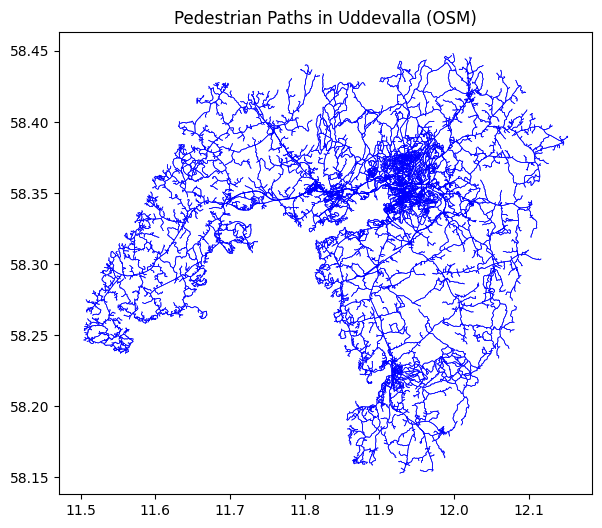

                              osmid      highway lanes maxspeed  \
u       v           key                                           
8691573 1700976861  0       8132548    secondary     1       50   
        4642788294  0     790470263  residential   NaN       50   
        10968187974 0    1181019543  residential   NaN       50   
8691575 8691601     0     238166932    secondary     1       50   
        10968187981 0    1181019532    secondary     3       50   

                                    name  oneway    ref reversed     length  \
u       v           key                                                       
8691573 1700976861  0    Strömstadsvägen   False  O 701    False  15.382223   
        4642788294  0     Bävebäcksgatan   False    NaN     True   7.926397   
        10968187974 0     Bävebäcksgatan   False    NaN     True   6.500231   
8691575 8691601     0    Strömstadsvägen   False  O 701     True  12.383229   
        10968187981 0    Västerlånggatan   False  O 668 

In [122]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

# Define an area (Uddevalla)
place_name = "Uddevalla, Sweden"

# Fetch pedestrian network
walk_network = ox.graph_from_place(place_name, network_type="walk")

# Convert to GeoDataFrame for analysis
edges = ox.graph_to_gdfs(walk_network, nodes=False)

# Plot pedestrian paths
edges.plot(figsize=(8, 6), color="blue", linewidth=0.5)
plt.title("Pedestrian Paths in Uddevalla (OSM)")
plt.show()

# Display summary of pedestrian paths
print(edges.head())


In [141]:
import osmnx as ox
import folium
from shapely.geometry import LineString

# Define start and end coordinates
start_point = (58.35068, 11.944785)  # Uddevalla Östra station
end_point = (58.349916, 11.930438)  # Uddevalla Kampenhof

# Create a polyline between the two points
polyline = LineString([(start_point[1], start_point[0]), (end_point[1], end_point[0])])
buffered_polyline = polyline.buffer(0.005)  # 5-meter buffer for precise walking paths

# Fetch pedestrian paths using multiple OSM tags
pedestrian_tags = {
    "highway": ["footway", "pedestrian", "path", "track"],
    "sidewalk": "yes",
    "access": ["permissive", "yes"]
}
walking_paths = ox.features_from_polygon(buffered_polyline, tags=pedestrian_tags)

# Initialize Folium Map
midpoint = ((start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2)
map_walk = folium.Map(location=midpoint, zoom_start=16)

# Define color mapping for different pedestrian path types
color_map = {
    "footway": "green",       # 🟢 Small pedestrian paths
    "pedestrian": "blue",     # 🔵 Larger pedestrian zones (city centers, plazas)
    "path": "purple",         # 🟣 General walking/hiking paths
    "track": "orange",        # 🟠 Wider paths, sometimes used for bikes/agriculture
    "sidewalk": "pink",       # 🌸 Sidewalks along roads
}

# Plot pedestrian paths with corresponding colors
for _, row in walking_paths.iterrows():
    if row.geometry.geom_type == "LineString":
        path_type = row.get("highway", "unknown")  # Get the type of path
        path_color = color_map.get(path_type, "gray")  # Default to gray if not in map

        coords = [(lat, lon) for lon, lat in row.geometry.coords]
        folium.PolyLine(coords, color=path_color, weight=3, tooltip=f"{path_type}").add_to(map_walk)

# Plot start and end points
folium.Marker(start_point, popup="Uddevalla Östra", icon=folium.Icon(color="blue")).add_to(map_walk)  # 🔵 Blue
folium.Marker(end_point, popup="Uddevalla Kampenhof", icon=folium.Icon(color="red")).add_to(map_walk)  # 🔴 Red

# Display the Map
map_walk

In [144]:
import osmnx as ox
import folium
import networkx as nx
from shapely.geometry import LineString

# Define start and end coordinates
start_point = (58.35068, 11.944785)  # Uddevalla Östra station
end_point = (58.349916, 11.930438)  # Uddevalla Kampenhof

# Create a polyline between the two points
polyline = LineString([(start_point[1], start_point[0]), (end_point[1], end_point[0])])
buffered_polyline = polyline.buffer(0.005)  # Small buffer for precise pedestrian paths

# Fetch pedestrian network within the buffered area
pedestrian_tags = {
    "highway": ["footway", "pedestrian", "path", "track", "sidewalk"],
    "sidewalk": "yes",
    "access": ["permissive", "yes"]
}
walking_paths = ox.features_from_polygon(buffered_polyline, tags=pedestrian_tags)

# Initialize Folium Map
midpoint = ((start_point[0] + end_point[0]) / 2, (start_point[1] + end_point[1]) / 2)
map_walk = folium.Map(location=midpoint, zoom_start=16)

# 🚀 **STEP 1: Merge All Pedestrian Paths into a Single Graph**
G = nx.Graph()

for _, row in walking_paths.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = list(row.geometry.coords)
        for i in range(len(coords) - 1):
            lat1, lon1 = coords[i][1], coords[i][0]
            lat2, lon2 = coords[i+1][1], coords[i+1][0]
            dist = LineString([coords[i], coords[i+1]]).length  # Distance between nodes
            G.add_edge((lat1, lon1), (lat2, lon2), weight=dist)

# 🚀 **STEP 2: Find the Closest Nodes for Start & End**
start_node = min(G.nodes, key=lambda node: Point(node).distance(Point(start_point)))
end_node = min(G.nodes, key=lambda node: Point(node).distance(Point(end_point)))

# 🚀 **STEP 3: Compute the Shortest Path Using the Merged Graph**
shortest_path = nx.shortest_path(G, start_node, end_node, weight="weight")
shortest_path_coords = list(shortest_path)

# 🚀 **STEP 4: Plot the Shortest Walking Path in Red**
folium.PolyLine(shortest_path_coords, color="red", weight=5, tooltip="Optimized Walking Path").add_to(map_walk)

# 🚀 **STEP 5: Plot All Available Pedestrian Paths in Green**
for _, row in walking_paths.iterrows():
    if row.geometry.geom_type == "LineString":
        coords = [(lat, lon) for lon, lat in row.geometry.coords]
        folium.PolyLine(coords, color="green", weight=2, tooltip="Available Walkways").add_to(map_walk)

# Plot start and end points
folium.Marker(start_point, popup="Uddevalla Östra", icon=folium.Icon(color="blue")).add_to(map_walk)  # 🔵 Start
folium.Marker(end_point, popup="Uddevalla Kampenhof", icon=folium.Icon(color="red")).add_to(map_walk)  # 🔴 End

# Display the Map
map_walk
